## TRICYCLE FRANCHISE BUSINESS ANALYTICS (2019-2024)

> Dataset: 13,881 operational records from 51 tricycles and 51 drivers

> Analysis Period: 2019-2024

> Target Variable for Supervised Learning

* TricycleAge (Regression)
→ Predict the vehicle’s age to support strategic asset lifecycle planning and optimize replacement timing.

> Project Objectives
* Optimize asset lifecycle management by forecasting tricycle age, supporting timely replacement and maximizing return on investment.

* Identify high-ROI vehicle models by analyzing how tricycle characteristics (make, series, maintenance history) relate to age and performance.

* Support cost control through insights on how age influences maintenance costs and operational efficiency.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.facecolor'] = '#f9f9f9'
plt.rcParams['grid.color'] = 'grey' 
plt.rcParams['grid.alpha'] = 0.09 
# Expand display options so nothing is truncated
pd.set_option('display.max_columns', None)        # show all columns
pd.set_option('display.max_colwidth', None)       # show full column names
pd.set_option('display.width', None)              # prevent line wrapping
pd.set_option('display.expand_frame_repr', False) # avoid breaking DataFrame into multiple lines

#### 1. DATA LOADING AND INITIAL EXPLORATION

In [5]:
# Load the dataset
df = pd.read_csv('Tricycle_Franchise_2019-2024.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Date Range: {df['DateRecord'].min()} to {df['DateRecord'].max()}")
df.head()

Dataset Shape: (13881, 38)
Date Range: 2019-01-01 to 2024-12-30


,Timestamp,Email Address,RecordID,RecordType,DateRecord,TricycleID,Make,Series,PlateNumber,YearModel,PurchaseDate,TricycleStatus,RegID,RegYear,RegExpiration,RegFee,RenewalDate,InstallmentPrice,DriverID,DriverName,DriverContactNo,LicenseNumber,DriverStartDate,OwnershipStatus,PaymentID,TransactionAmount,PaymentType,RemainingBalance,WeekStartDate,WeekEndDate,MaintenanceID,MaintenanceType,ExpenseCategory,RepairDate,ServiceProvider,PaymentStatus,CostResponsibility,Notes
0,6/13/2025 14:10:43,admin@tricyclefranchise.com,REC000001,REGISTRATION,2019-03-04,TR0001,KAWASAKI,BARAKO150,997JQZ,2020,2020-10-26,ACTIVE,RE0001,2019,2020-03-31,"₱3,000.00",2019-03-04,₱0.00,DRV0001,Jesus Ramos,0918-288-6561,J03-21-643341,2019-06-24,RENTAL,PA000001,"₱3,000.00",CASH_PAYMENT,₱0.00,NaN,NaN,MA000001,NONE,REGULATORY_FEES,NaN,NaN,PAID_FULL,OPERATOR_COST,Annual registration renewal for 2019
1,6/13/2025 14:10:43,admin@tricyclefranchise.com,REC000002,REGISTRATION,2020-03-03,TR0001,KAWASAKI,BARAKO150,997JQZ,2020,2020-10-26,ACTIVE,RE0002,2020,2021-03-31,"₱3,000.00",2020-03-03,₱0.00,DRV0001,Jesus Ramos,0918-288-6561,J03-21-643341,2019-06-24,RENTAL,PA000002,"₱3,000.00",CASH_PAYMENT,₱0.00,NaN,NaN,MA000002,NONE,REGULATORY_FEES,NaN,NaN,PAID_FULL,OPERATOR_COST,Annual registration renewal for 2020
2,6/13/2025 14:10:43,admin@tricyclefranchise.com,REC000003,REGISTRATION,2021-03-19,TR0001,KAWASAKI,BARAKO150,997JQZ,2020,2020-10-26,ACTIVE,RE0003,2021,2022-03-31,"₱1,500.00",2021-03-19,₱0.00,DRV0001,Jesus Ramos,0918-288-6561,J03-21-643341,2019-06-24,RENTAL,PA000003,"₱1,500.00",CASH_PAYMENT,₱0.00,NaN,NaN,MA000003,NONE,REGULATORY_FEES,NaN,NaN,PAID_FULL,OPERATOR_COST,Annual registration renewal for 2021
3,6/13/2025 14:10:43,admin@tricyclefranchise.com,REC000004,REGISTRATION,2022-03-09,TR0001,KAWASAKI,BARAKO150,997JQZ,2020,2020-10-26,ACTIVE,RE0004,2022,2023-03-31,"₱2,000.00",2022-03-09,₱0.00,DRV0001,Jesus Ramos,0918-288-6561,J03-21-643341,2019-06-24,RENTAL,PA000004,"₱2,000.00",CASH_PAYMENT,₱0.00,NaN,NaN,MA000004,NONE,REGULATORY_FEES,NaN,NaN,PAID_FULL,OPERATOR_COST,Annual registration renewal for 2022
4,6/13/2025 14:10:43,admin@tricyclefranchise.com,REC000005,REGISTRATION,2023-03-04,TR0001,KAWASAKI,BARAKO150,997JQZ,2020,2020-10-26,ACTIVE,RE0005,2023,2024-03-31,"₱2,500.00",2023-03-04,₱0.00,DRV0001,Jesus Ramos,0918-288-6561,J03-21-643341,2019-06-24,RENTAL,PA000005,"₱2,500.00",CASH_PAYMENT,₱0.00,NaN,NaN,MA000005,NONE,REGULATORY_FEES,NaN,NaN,PAID_FULL,OPERATOR_COST,Annual registration renewal for 2023


In [ ]:
# Data types
print("\nData Types Summary:")
print(df.dtypes.value_counts())

print("\nCOLUMN INFORMATION")
print("-" * 40)
info_df = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique Values': df.nunique()
})
print(info_df.to_string(index=False))

#### 2. DATA QUALITY ASSESSMENT


2. DATA QUALITY ASSESSMENT
----------------------------------------
Missing Data Analysis:
         Column  Missing_Count  Missing_Percentage Data_Type
ServiceProvider          11888           85.642245    object
     RepairDate          11364           81.867301    object
  LicenseNumber           6083           43.822491    object
DriverContactNo           4230           30.473309    object
  WeekStartDate           2769           19.948131    object
    WeekEndDate           2769           19.948131    object

Duplicate Records: 0

Date Range Validation:
- Earliest Date: 2019-01-01
- Latest Date: 2024-12-30
- Date Span: 2190 days 00:00:00


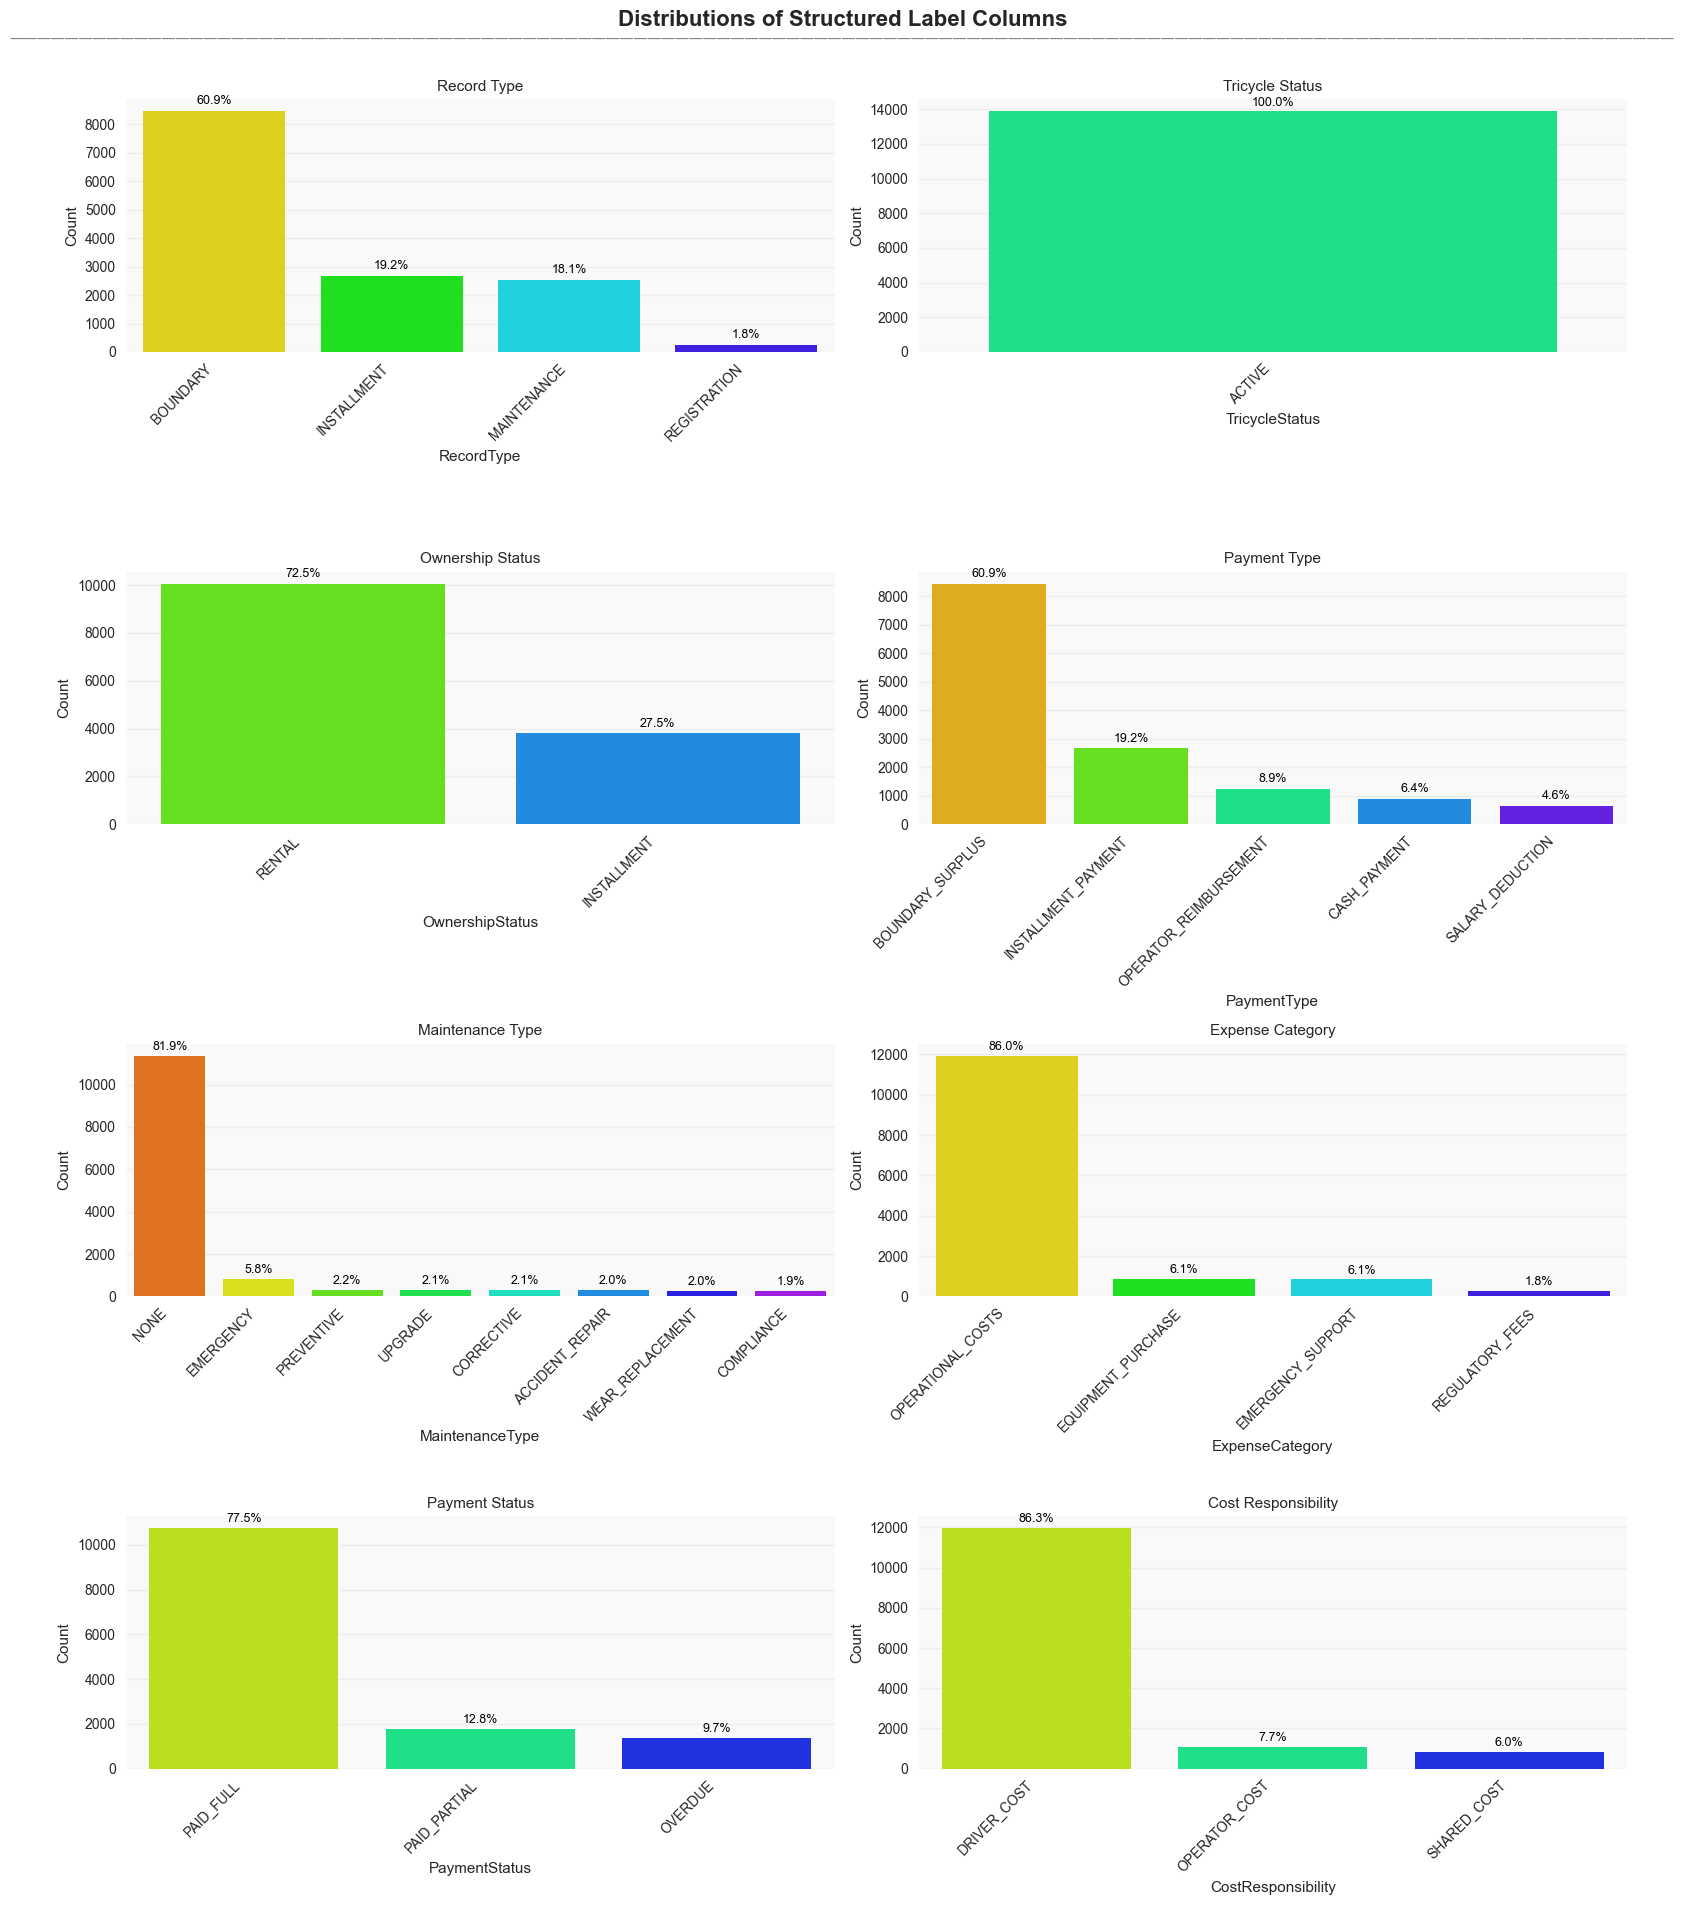

In [3]:
print("\n2. DATA QUALITY ASSESSMENT")
print("-" * 40)

# Missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Data Analysis:")
print(missing_data[missing_data['Missing_Count'] > 0].to_string(index=False))

# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Records: {duplicates}")

# Date range validation
print(f"\nDate Range Validation:")
print(f"- Earliest Date: {df['DateRecord'].min()}")
print(f"- Latest Date: {df['DateRecord'].max()}")
print(f"- Date Span: {pd.to_datetime(df['DateRecord']).max() - pd.to_datetime(df['DateRecord']).min()}")

# Pie Charts for Structured Label Columns
def plot_bar(data, column_name, title, ax, palette_name='gist_rainbow'):
    counts = data[column_name].value_counts()
    total = len(data)
    percentages = (counts / total * 100).round(1)

    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette=palette_name)

    # Annotate bars with percentage
    for i, (count, pct) in enumerate(zip(counts.values, percentages.values)):
        ax.text(i, count + total * 0.01, f'{pct}%', ha='center', va='bottom', fontsize=9, color='black')

    ax.set_title(title, fontsize=11)
    ax.set_ylabel('Count')
    ax.set_xlabel(column_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

plot_bar(df, 'RecordType', 'Record Type', axes[0])
plot_bar(df, 'TricycleStatus', 'Tricycle Status', axes[1])
plot_bar(df, 'OwnershipStatus', 'Ownership Status', axes[2])
plot_bar(df, 'PaymentType', 'Payment Type', axes[3])
plot_bar(df, 'MaintenanceType', 'Maintenance Type', axes[4])
plot_bar(df, 'ExpenseCategory', 'Expense Category', axes[5])
plot_bar(df, 'PaymentStatus', 'Payment Status', axes[6])
plot_bar(df, 'CostResponsibility', 'Cost Responsibility', axes[7])

plt.suptitle('Distributions of Structured Label Columns', fontsize=16, fontweight='bold')
fig.text(0.5, 0.965, '―' * 120, ha='center', va='center', fontsize=10, color='gray')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

>Key Identification Columns:

* RecordID: Unique transaction identifier
* TricycleID: Vehicle identifier (TR0001-TR0051, 51 units)
* DriverID: Driver identifier (DRV0001+)
* PaymentID, MaintenanceID, RegID: Transaction-specific IDs

>Temporal Features:

* Timestamp, DateRecord: Transaction timing
* PurchaseDate, RegExpiration, RenewalDate: Vehicle lifecycle dates
* DriverStartDate: Driver employment start
* WeekStartDate, WeekEndDate: Payment period boundaries
* RepairDate: Maintenance timing

>Vehicle Characteristics:

* Make: Manufacturer (Honda, Kawasaki, Yamaha)
* Series: Model variants (SUPREMO, BARAKO150, YTX125, TMXS2J)
* PlateNumber: Vehicle registration
* YearModel: Manufacturing year
* TricycleStatus: Operational status (ACTIVE, INACTIVE, SOLD)

>Financial Parameters:

* TransactionAmount: Payment amounts (₱250-₱1250 daily/weekly)
* InstallmentPrice: Vehicle purchase price (₱170K-₱300K)
* RemainingBalance: Outstanding debt
* RegFee: Registration costs (₱1.5K-₱3K)

>Operational Classifications:

* RecordType: Transaction category (BOUNDARY 60.4%, INSTALLMENT 19.6%, MAINTENANCE 18.2%, REGISTRATION 1.8%)
* OwnershipStatus: Business model (INSTALLMENT, RENTAL, OWNER)
* PaymentType: Payment method (8 categories including CASH_PAYMENT, BOUNDARY_SURPLUS)
* PaymentStatus: Payment state (PAID_FULL, OVERDUE, PENDING, etc.)
* MaintenanceType: Service category (PREVENTIVE, CORRECTIVE, EMERGENCY, etc.)
* CostResponsibility: Who pays (OPERATOR_COST, DRIVER_COST, SHARED_COST, etc.)

#### 3. DATA PREPARATION & CLEANING

In [4]:
print("\n DATA PREPARATION")
print("-" * 40)

# Create a copy for processing
df_clean = df.copy()

# Convert date columns
date_columns = ['Timestamp', 'DateRecord', 'PurchaseDate', 'RegExpiration',
                'RenewalDate', 'DriverStartDate', 'WeekStartDate', 'WeekEndDate', 'RepairDate']

for col in date_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
        print(f"> Converted {col} to datetime")

# Clean currency columns
currency_columns = ['RegFee', 'InstallmentPrice', 'TransactionAmount', 'RemainingBalance']

for col in currency_columns:
    if col in df_clean.columns:
        # Remove currency symbols and convert to numeric
        df_clean[col] = df_clean[col].astype(str).str.replace('₱', '').str.replace(',', '')
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        print(f"> Cleaned currency column: {col}")

# Standardize categorical columns
categorical_columns = ['RecordType', 'Make', 'Series', 'TricycleStatus', 'OwnershipStatus',
                      'PaymentType', 'MaintenanceType', 'ExpenseCategory', 'PaymentStatus', 'CostResponsibility']

for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.upper().str.strip()
        print(f"> Standardized categorical column: {col}")


 DATA PREPARATION
----------------------------------------
> Converted Timestamp to datetime
> Converted DateRecord to datetime
> Converted PurchaseDate to datetime
> Converted RegExpiration to datetime
> Converted RenewalDate to datetime
> Converted DriverStartDate to datetime
> Converted WeekStartDate to datetime
> Converted WeekEndDate to datetime
> Converted RepairDate to datetime
> Cleaned currency column: RegFee
> Cleaned currency column: InstallmentPrice
> Cleaned currency column: TransactionAmount
> Cleaned currency column: RemainingBalance
> Standardized categorical column: RecordType
> Standardized categorical column: Make
> Standardized categorical column: Series
> Standardized categorical column: TricycleStatus
> Standardized categorical column: OwnershipStatus
> Standardized categorical column: PaymentType
> Standardized categorical column: MaintenanceType
> Standardized categorical column: ExpenseCategory
> Standardized categorical column: PaymentStatus
> Standardized ca

In [17]:
print("HANDLING MISSING VALUES")
print("-" * 40)

missing_data = pd.DataFrame({
    'Column': df_clean.columns,
    'Missing Count': df_clean.isnull().sum(),
    'Missing %': (df_clean.isnull().sum() / len(df_clean) * 100).round(2),
})
missing_data['Non-Null %'] = (100 - missing_data['Missing %']).round(2)

# Filter only columns with missing data
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing %', ascending=False)

display(missing_data)

# Summary flags based on defined logic
df_clean['HasMaintenance'] = df_clean['MaintenanceType'] != 'NONE'
df_clean['IsOverdue'] = df_clean['PaymentStatus'] == 'OVERDUE'
df_clean['IsEmergencyRepair'] = df_clean['MaintenanceType'] == 'EMERGENCY'

# Highlight contextual nulls with no imputation
special_nulls = {    
    'ServiceProvider': " Commonly missing due to in-house repair logging",
    'RepairDate':      " Applies only to maintenance records",
    'LicenseNumber':   " May be missing for new drivers with pending permits",
    'DriverContactNo': " May be omitted for privacy or outdated records",
    'WeekStartDate':   " Not applicable to non-boundary/installment records",
    'WeekEndDate':     " Same as above – only for weekly payment records"
}

for col, note in special_nulls.items():
    null_pct = df_clean[col].isnull().mean() * 100
    non_null_pct = 100 - null_pct
    print(f"> {col}: {null_pct:.2f}% missing → {note} {non_null_pct:.2f}%")

print(f"\n> Data preparation complete! Shape: {df_clean.shape}")

HANDLING MISSING VALUES
----------------------------------------


,Column,Missing Count,Missing %,Non-Null %
ServiceProvider,ServiceProvider,11888,85.64,14.36
DaysLastMaintenance,DaysLastMaintenance,11364,81.87,18.13
RepairDate,RepairDate,11364,81.87,18.13
LicenseNumber,LicenseNumber,6083,43.82,56.18
DriverContactNo,DriverContactNo,4230,30.47,69.53
WeekEndDate,WeekEndDate,2769,19.95,80.05
WeekStartDate,WeekStartDate,2769,19.95,80.05
AgeCategory,AgeCategory,2607,18.78,81.22
TenureCategory,TenureCategory,3,0.02,99.98


> ServiceProvider: 85.64% missing →  Commonly missing due to in-house repair logging 14.36%
> RepairDate: 81.87% missing →  Applies only to maintenance records 18.13%
> LicenseNumber: 43.82% missing →  May be missing for new drivers with pending permits 56.18%
> DriverContactNo: 30.47% missing →  May be omitted for privacy or outdated records 69.53%
> WeekStartDate: 19.95% missing →  Not applicable to non-boundary/installment records 80.05%
> WeekEndDate: 19.95% missing →  Same as above – only for weekly payment records 80.05%

> Data preparation complete! Shape: (13881, 62)


#### 4. FEATURE ENGINEERING


 CREATING DERIVED FEATURES
----------------------------------------
> Created date-based features: Year, Month, Quarter, DayOfWeek, WeekOfYear, IsWeekend
> Created tricycle age feature:  Understand asset aging for fleet management
> Created payment progress features: See how close drivers are to full payment
> Created seasonal classification: Helps understand operational performance across different times of the year
> Created driver tenure features: Gauge experience level or loyalty
> Created payment behavior features: frequency, amount, variability
> Created maintenance frequency and last repair features
> Created risk flags: HighRiskDriver, HighMaintenanceTricycle


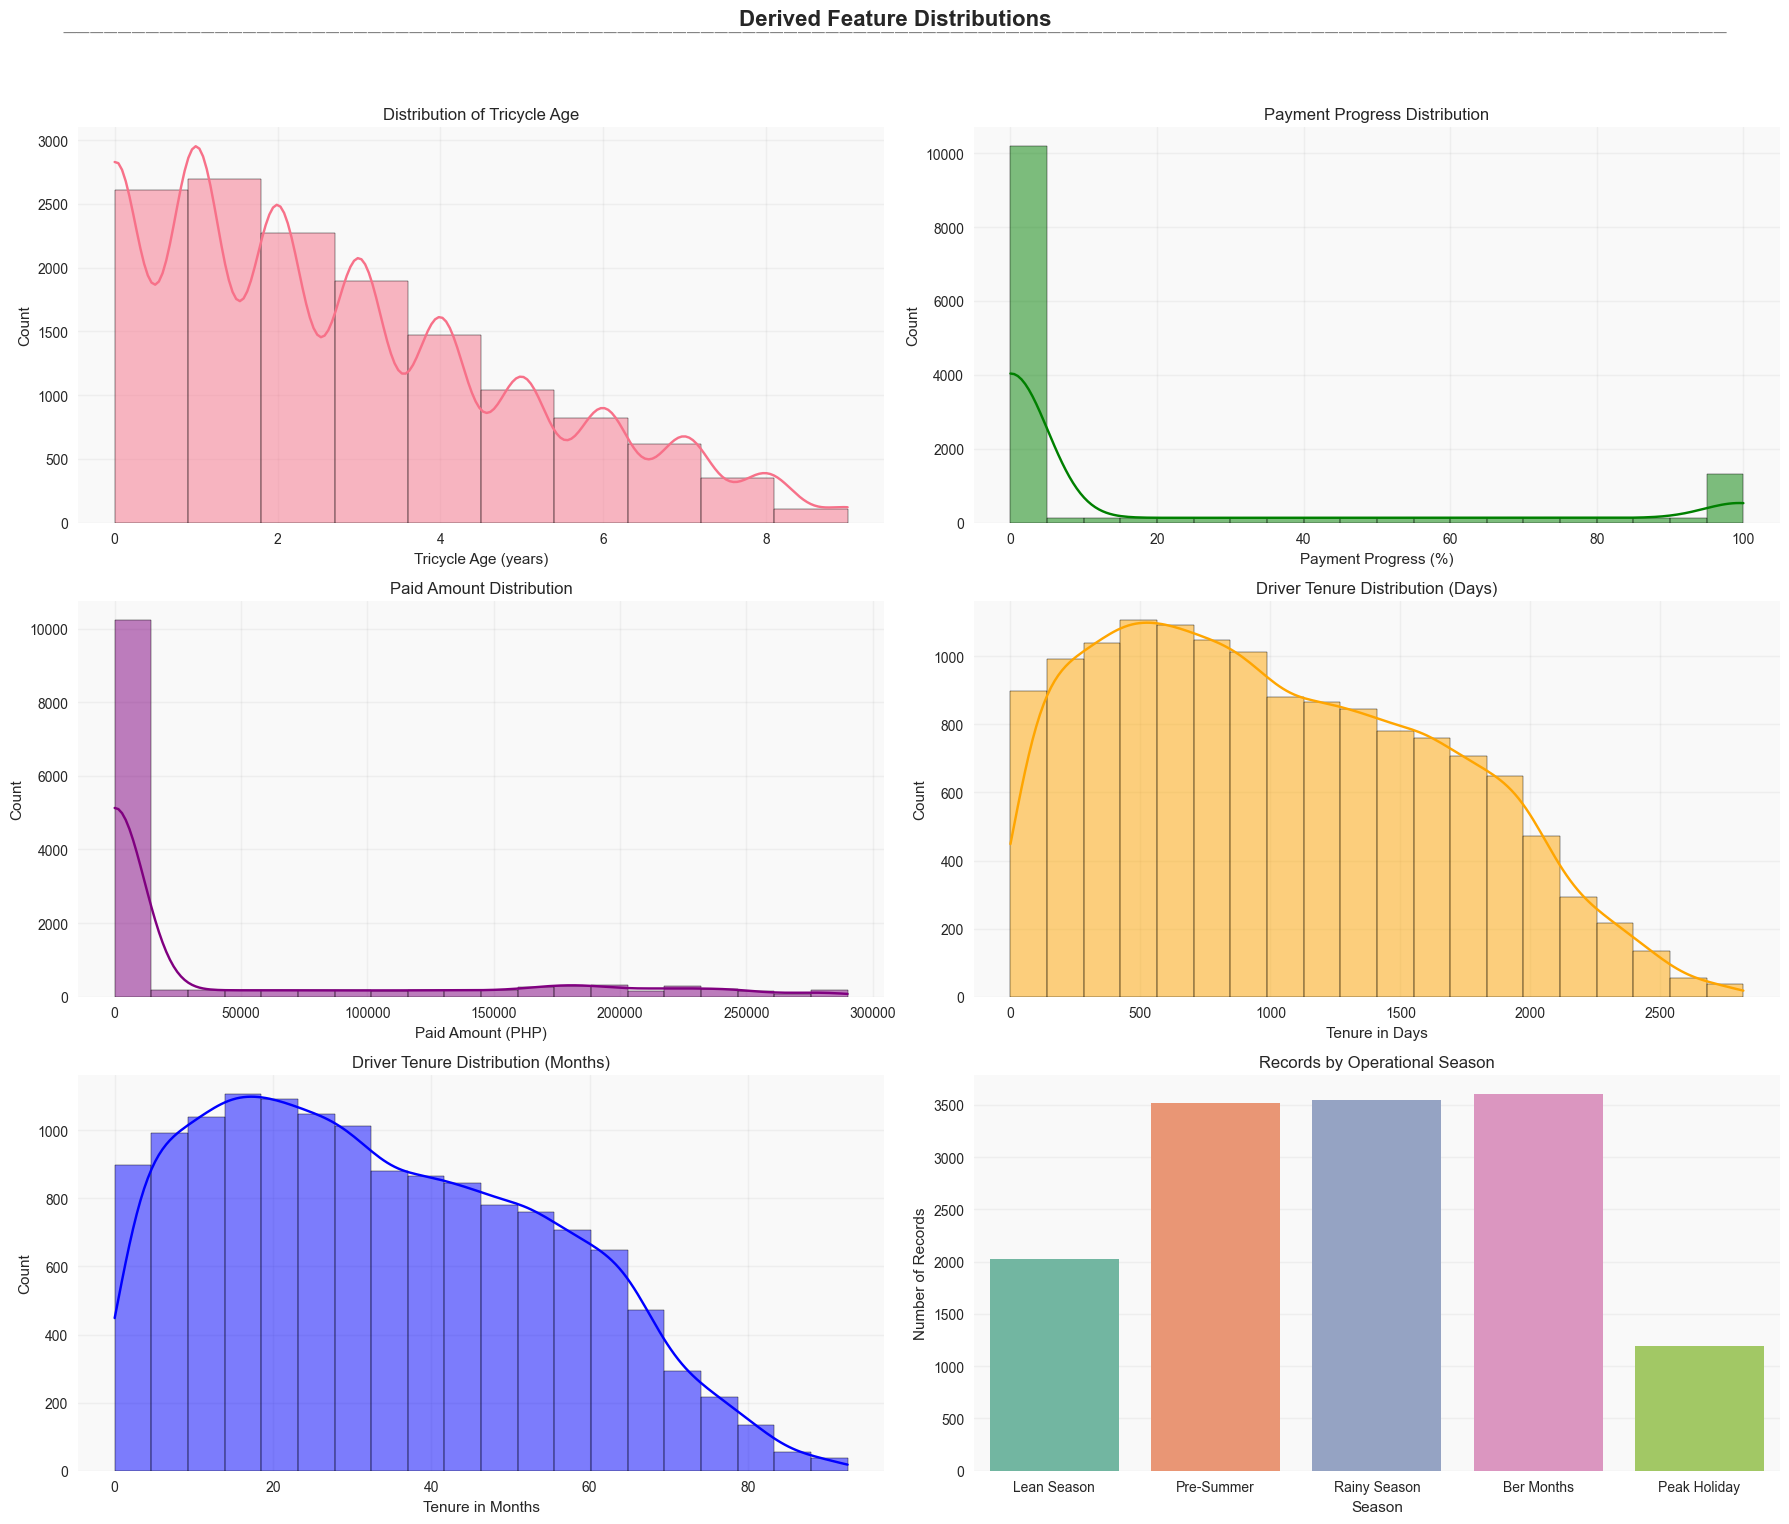

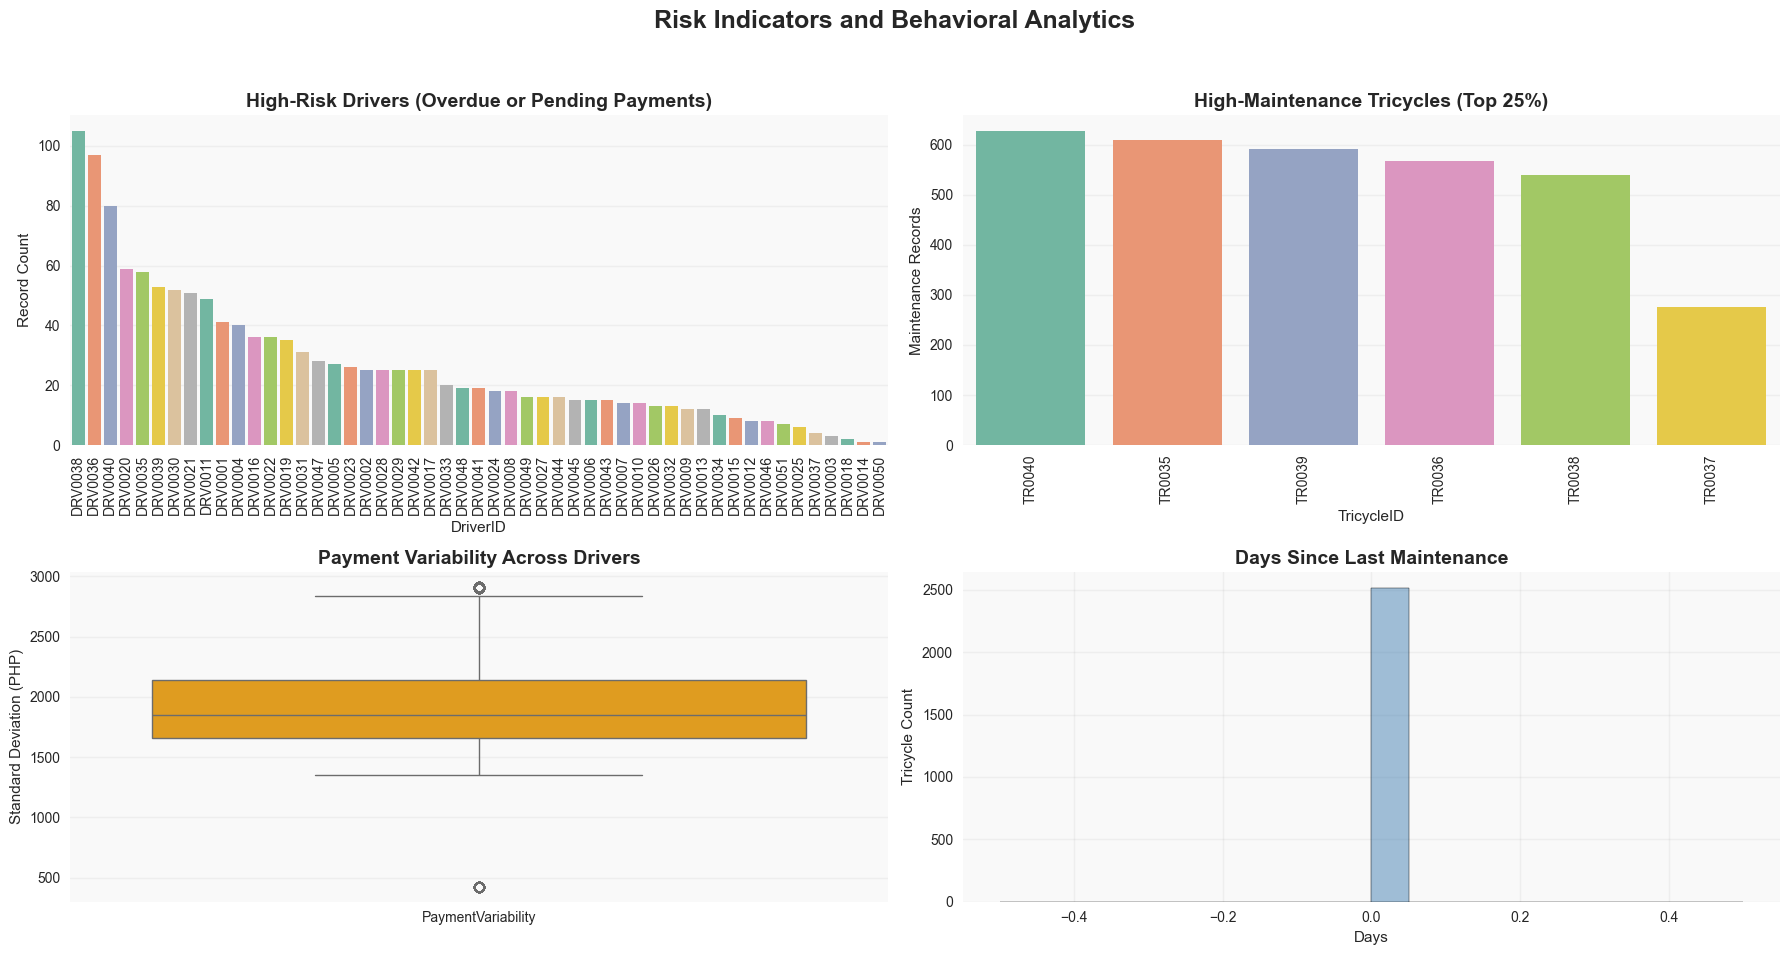

In [6]:
print("\n CREATING DERIVED FEATURES")
print("-" * 40)

# Date-based features
if 'DateRecord' in df_clean.columns:
    df_clean['Year'] = df_clean['DateRecord'].dt.year
    df_clean['Month'] = df_clean['DateRecord'].dt.month
    df_clean['Quarter'] = df_clean['DateRecord'].dt.quarter
    df_clean['DayOfWeek'] = df_clean['DateRecord'].dt.dayofweek
    df_clean['WeekOfYear'] = df_clean['DateRecord'].dt.isocalendar().week
    df_clean['IsWeekend'] = df_clean['DayOfWeek'].isin([5, 6])
    print("> Created date-based features: Year, Month, Quarter, DayOfWeek, WeekOfYear, IsWeekend")
# Age of tricycle
if 'YearModel' in df_clean.columns and 'DateRecord' in df_clean.columns:
    df_clean['Year'] = df_clean['DateRecord'].dt.year
    min_valid_year = df_clean['DateRecord'].dt.year.min()  # Earliest recordable year
    # Fix: Replace YearModel > DateRecord.year with the min_valid_year
    condition = df_clean['YearModel'] > df_clean['Year']
    df_clean.loc[condition, 'YearModel'] = min_valid_year
    df_clean['TricycleAge'] = df_clean['Year'] - df_clean['YearModel']
    print("> Created tricycle age feature:  Understand asset aging for fleet management")
# Financial features
if 'InstallmentPrice' in df_clean.columns and 'RemainingBalance' in df_clean.columns:
    df_clean['PaidAmount'] = df_clean['InstallmentPrice'] - df_clean['RemainingBalance'].fillna(0)
    df_clean['PaymentProgress'] = (df_clean['PaidAmount'] / df_clean['InstallmentPrice'] * 100).fillna(0)
    print("> Created payment progress features: See how close drivers are to full payment")
# Season classification for operational performance
if 'Month' in df_clean.columns:
    def get_season(month):
        if month in [1, 2]:
            return 'Lean Season' # Typically low demand months
        elif month in [3, 4, 5]:
            return 'Pre-Summer'  # Transition to summer, often high demand
        elif month in [6, 7, 8]:
            return 'Rainy Season' # Heavy rains, potential for repairs
        elif month in [9, 10, 11]:
            return 'Ber Months'   # Start of holiday season, high demand
        elif month == 12:
            return 'Peak Holiday' # December is peak holiday season

    df_clean['Season'] = df_clean['Month'].apply(get_season)
    print("> Created seasonal classification: Helps understand operational performance across different times of the year")
# Driver tenure (How Long in service)
if 'DriverStartDate' in df_clean.columns and 'DateRecord' in df_clean.columns:
    condition = df_clean['DriverStartDate'] > df_clean['DateRecord']    
    # Replace invalid future start dates with the earliest valid date in the dataset
    min_start_date = df_clean['DateRecord'].min()
    df_clean.loc[condition, 'DriverStartDate'] = min_start_date    
    df_clean['DriverTenure'] = (df_clean['DateRecord'] - df_clean['DriverStartDate']).dt.days
    df_clean['DriverTenureMonths'] = df_clean['DriverTenure'] / 30.44
    print("> Created driver tenure features: Gauge experience level or loyalty")

# Business-specific features
df_clean['PaymentFrequency'] = df_clean.groupby('DriverID')['TransactionAmount'].transform('count')
df_clean['AvgPaymentAmount'] = df_clean.groupby('DriverID')['TransactionAmount'].transform('mean')
df_clean['PaymentVariability'] = df_clean.groupby('DriverID')['TransactionAmount'].transform('std')
df_clean['MaintenanceFrequency'] = df_clean.groupby('TricycleID')['HasMaintenance'].transform('sum')
df_clean['DaysLastMaintenance'] = (pd.to_datetime(df_clean['DateRecord']) - 
                             pd.to_datetime(df_clean['RepairDate'])).dt.days
print("> Created payment behavior features: frequency, amount, variability")
print("> Created maintenance frequency and last repair features")

# Risk indicators
df_clean['HighRiskDriver'] = ((df_clean['PaymentStatus'] == 'OVERDUE') | 
                        (df_clean['PaymentStatus'] == 'PENDING')).astype(int)
df_clean['HighMaintenanceTricycle'] = (df_clean['MaintenanceFrequency'] > 
                                df_clean['MaintenanceFrequency'].quantile(0.75)).astype(int)
print("> Created risk flags: HighRiskDriver, HighMaintenanceTricycle")

fig, axes = plt.subplots(3, 2, figsize=(18, 16))
axes = axes.flatten()
palette = 'Set2'

# 1. Tricycle Age Distribution
sns.histplot(df_clean['TricycleAge'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Tricycle Age')
axes[0].set_xlabel('Tricycle Age (years)')
axes[0].set_ylabel('Count')

# 2. Payment Progress Distribution
sns.histplot(df_clean['PaymentProgress'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Payment Progress Distribution')
axes[1].set_xlabel('Payment Progress (%)')
axes[1].set_ylabel('Count')

# 3. Paid Amount Distribution
sns.histplot(df_clean['PaidAmount'], bins=20, kde=True, ax=axes[2], color='purple')
axes[2].set_title('Paid Amount Distribution')
axes[2].set_xlabel('Paid Amount (PHP)')
axes[2].set_ylabel('Count')

# 4. Driver Tenure (Days)
sns.histplot(df_clean['DriverTenure'], bins=20, kde=True, ax=axes[3], color='orange')
axes[3].set_title('Driver Tenure Distribution (Days)')
axes[3].set_xlabel('Tenure in Days')
axes[3].set_ylabel('Count')

# 5. Driver Tenure in Months
sns.histplot(df_clean['DriverTenureMonths'], bins=20, kde=True, ax=axes[4], color='blue')
axes[4].set_title('Driver Tenure Distribution (Months)')
axes[4].set_xlabel('Tenure in Months')
axes[4].set_ylabel('Count')

# 6. Season Distribution (Bar)
season_order = ['Lean Season', 'Pre-Summer', 'Rainy Season', 'Ber Months', 'Peak Holiday']
season_counts = df_clean['Season'].value_counts().sort_index()
sns.barplot(x=season_counts.index, y=season_counts.values, order=season_order, ax=axes[5], palette=palette)
axes[5].set_title('Records by Operational Season')
axes[5].set_xlabel('Season')
axes[5].set_ylabel('Number of Records')

# Final layout
plt.suptitle('Derived Feature Distributions', fontsize=16, fontweight='bold')
fig.text(0.5, 0.965, '―' * 120, ha='center', va='center', fontsize=10, color='gray')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Visualizing Risk Indicators and Behavioral Analytics
plt.figure(figsize=(18, 10))
palette = 'Set2'
# 1. High-Risk Drivers (Bar count)
plt.subplot(2, 2, 1)
high_risk_drivers = df_clean[df_clean['HighRiskDriver'] == 1]['DriverID'].value_counts()
sns.barplot(x=high_risk_drivers.index, y=high_risk_drivers.values, palette=palette)
plt.title("High-Risk Drivers (Overdue or Pending Payments)", fontsize=14, weight='bold')
plt.ylabel("Record Count")
plt.xticks(rotation=90)

# 2. High-Maintenance Tricycles
plt.subplot(2, 2, 2)
high_maint_trikes = df_clean[df_clean['HighMaintenanceTricycle'] == 1]['TricycleID'].value_counts()
sns.barplot(x=high_maint_trikes.index, y=high_maint_trikes.values, palette=palette)
plt.title("High-Maintenance Tricycles (Top 25%)", fontsize=14, weight='bold')
plt.ylabel("Maintenance Records")
plt.xticks(rotation=90)

# 3. Payment Variability Distribution (Boxplot)
plt.subplot(2, 2, 3)
sns.boxplot(data=df_clean[['PaymentVariability']], color='orange')
plt.title("Payment Variability Across Drivers", fontsize=14, weight='bold')
plt.ylabel("Standard Deviation (PHP)")

# 4. Days Since Last Maintenance (Histogram)
plt.subplot(2, 2, 4)
sns.histplot(df_clean['DaysLastMaintenance'].dropna(), bins=20, color='steelblue', kde=True)
plt.title("Days Since Last Maintenance", fontsize=14, weight='bold')
plt.xlabel("Days")
plt.ylabel("Tricycle Count")

# Layout
plt.suptitle("Risk Indicators and Behavioral Analytics", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

| Season Label   | Months  | Notes                                                                 |
| -------------- | ------- | --------------------------------------------------------------------- |
| `Lean Season`  | Jan–Feb | Post-holiday lull, rainy weather persists, slower traffic             |
| `Pre-Summer`   | Mar–May | Graduation, hot dry months, more movement                             |
| `Rainy Season` | Jun–Aug | Typhoons, reduced trips, higher maintenance needs                     |
| `Ber Months`   | Sep–Nov | Start of holiday buildup, increased transport demand                  |
| `Peak Holiday` | Dec     | Christmas, bonuses, heavy commuting and deliveries                    |

In [7]:
print("\nCOLUMN INFORMATION (UPDATED)")
print("-" * 40)

info_df = pd.DataFrame({
    'Column': df_clean.columns,
    'Data Type': df_clean.dtypes,
    'Non-Null Count': df_clean.count(),
    'Null Count': df_clean.isnull().sum(),
    'Null %': (df_clean.isnull().sum() / len(df_clean) * 100).round(2),
    'Unique Values': df_clean.nunique()
})

print(info_df.to_string(index=False))
print(f"\n> Feature Engineering complete! Shape: {df_clean.shape}")


COLUMN INFORMATION (UPDATED)
----------------------------------------
                 Column      Data Type  Non-Null Count  Null Count  Null %  Unique Values
              Timestamp datetime64[ns]           13881           0    0.00              8
          Email Address         object           13881           0    0.00              1
               RecordID         object           13881           0    0.00          12302
             RecordType         object           13881           0    0.00              4
             DateRecord datetime64[ns]           13881           0    0.00           2160
             TricycleID         object           13881           0    0.00             51
                   Make         object           13881           0    0.00              3
                 Series         object           13881           0    0.00              4
            PlateNumber         object           13881           0    0.00             50
              YearModel      

#### 4. EXPLORATORY DATA ANALYSIS (EDA)

## > Insights from the key variables

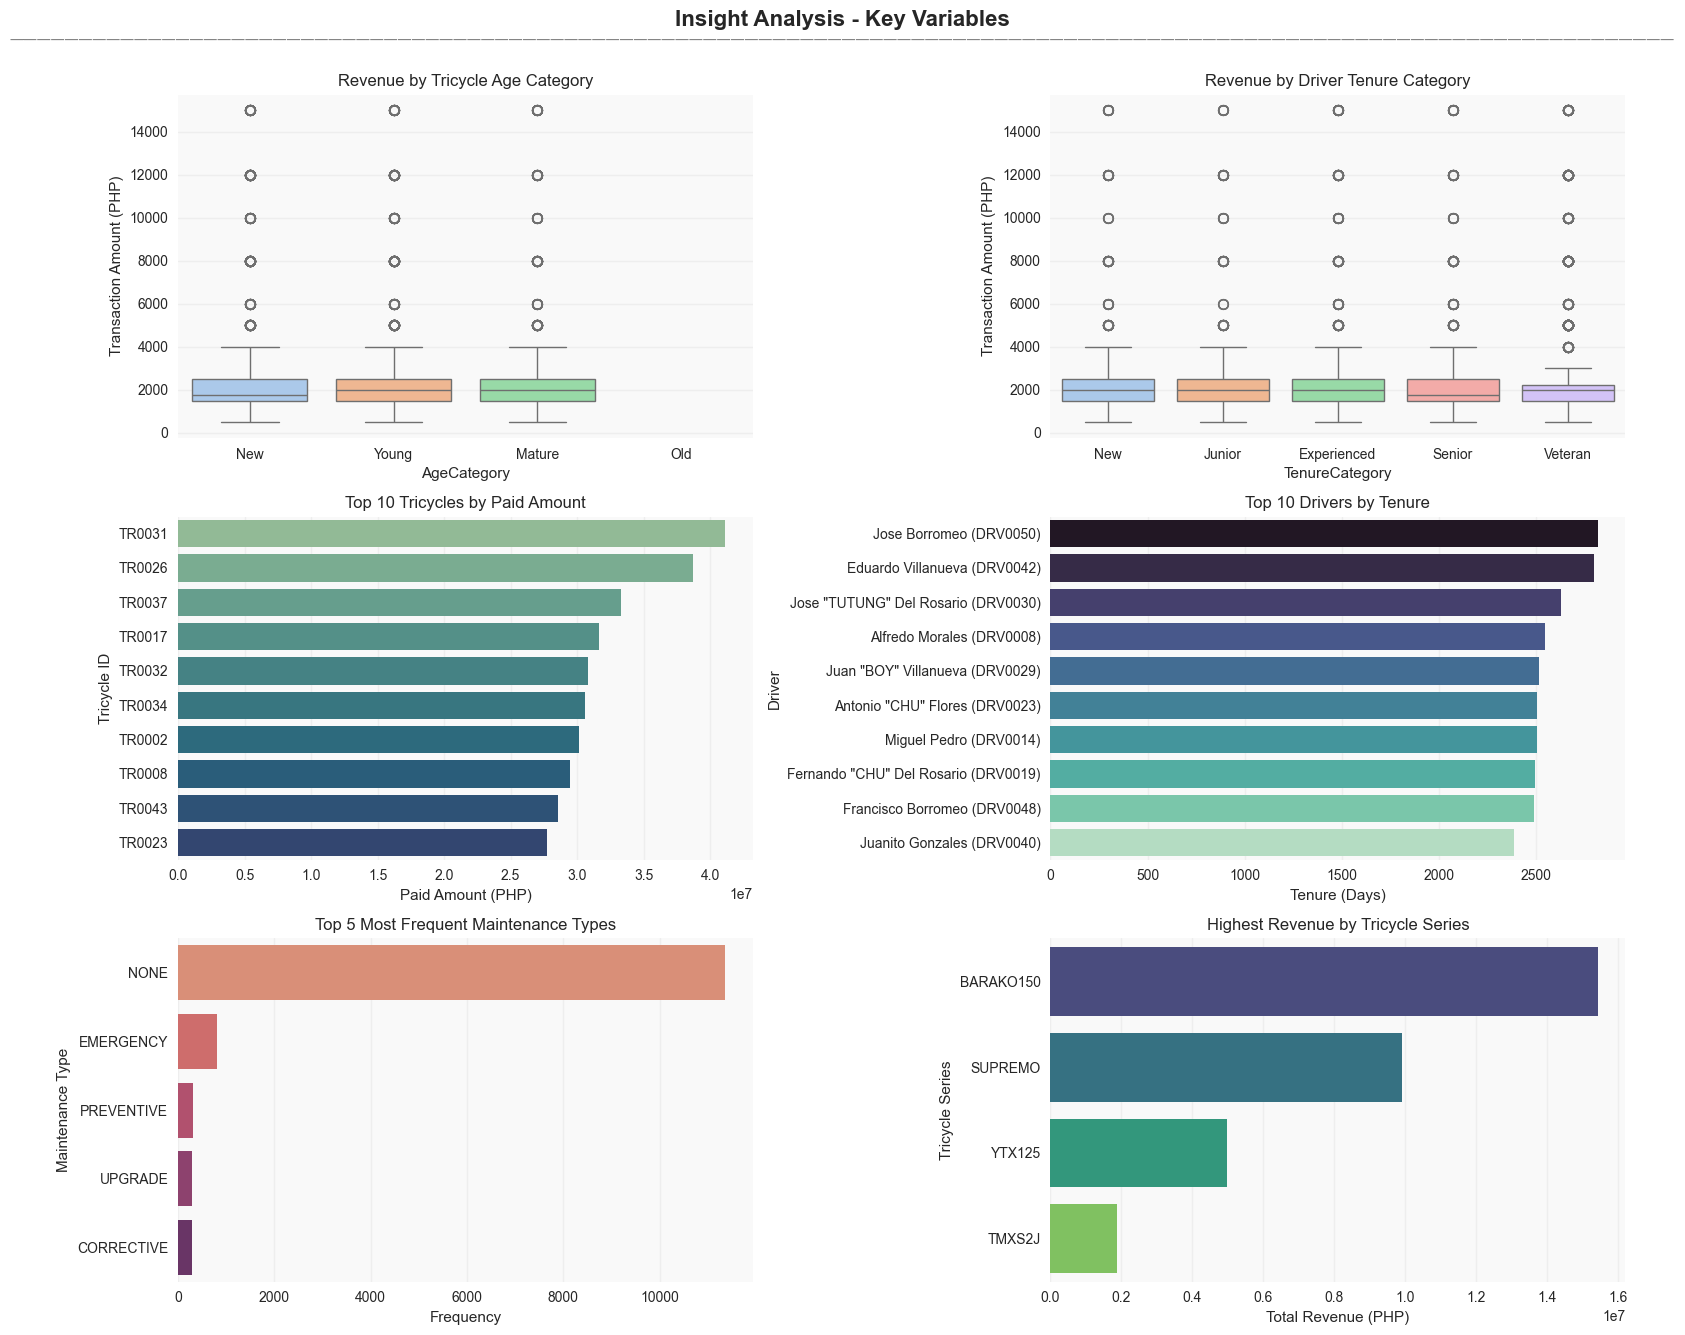


SUMMARY INSIGHTS
----------------------------------------
Total Records Analyzed: 13,881
Total Units Analyzed: 51
Average Tricycle Age: 2 years and 8 months
Average Driver Tenure: 2 years and 9 months
Payment Completion Progress: 18.0%
Total Revenue Collected: ₱32,211,750.00
Total Outstanding Balance: ₱299,956,500.00


Avg_Driver_Reliability_Score: 0.7780
Avg_Maintenance_Frequency: 50.3400
Avg_Revenue_Per_Tricycle_Per_Month: 9966.5068
Payment_Default_Rate: 0.1218
Asset_Utilization_Rate: 1.0000


In [8]:
# Binning: Tricycle Age and Driver Tenure
age_bins = [0, 2, 5, 10, float('inf')]
age_labels = ['New', 'Young', 'Mature', 'Old']
df_clean['AgeCategory'] = pd.cut(df_clean['TricycleAge'], bins=age_bins, labels=age_labels)

tenure_bins = [0, 6, 12, 24, 36, float('inf')]
tenure_labels = ['New', 'Junior', 'Experienced', 'Senior', 'Veteran']
df_clean['TenureCategory'] = pd.cut(df_clean['DriverTenureMonths'], bins=tenure_bins, labels=tenure_labels)

# Prepare subplots for 6 graphs
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Insight Analysis - Key Variables', fontsize=16, fontweight='bold')
fig.text(0.5, 0.958, '―' * 120, ha='center', va='center', fontsize=10, color='gray')
axes = axes.flatten()  # Flatten for easier indexing

# 1. Revenue by Tricycle Age Category
sns.boxplot(data=df_clean, x='AgeCategory', y='TransactionAmount', ax=axes[0], palette='pastel')
axes[0].set_title("Revenue by Tricycle Age Category")
axes[0].set_ylabel("Transaction Amount (PHP)")

# 2. Revenue by Driver Tenure Category
sns.boxplot(data=df_clean, x='TenureCategory', y='TransactionAmount', ax=axes[1], palette='pastel')
axes[1].set_title("Revenue by Driver Tenure Category")
axes[1].set_ylabel("Transaction Amount (PHP)")

# 3. Top 10 Tricycles by Paid Amount
top_trikes = df_clean.groupby('TricycleID')['PaidAmount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_trikes.values, y=top_trikes.index, palette='crest', ax=axes[2])
axes[2].set_title("Top 10 Tricycles by Paid Amount")
axes[2].set_xlabel("Paid Amount (PHP)")
axes[2].set_ylabel("Tricycle ID")

# 4. Top 10 Drivers by Tenure
top_drivers = df_clean.groupby(['DriverID', 'DriverName'])['DriverTenure'].max().sort_values(ascending=False).head(10)
sns.barplot(x=top_drivers.values, y=[f"{i[1]} ({i[0]})" for i in top_drivers.index], palette='mako', ax=axes[3])
axes[3].set_title("Top 10 Drivers by Tenure")
axes[3].set_xlabel("Tenure (Days)")
axes[3].set_ylabel("Driver")

# 5. Top 5 Maintenance Types
top_maintenance = df_clean['MaintenanceType'].value_counts().head(5)
sns.barplot(x=top_maintenance.values, y=top_maintenance.index, palette='flare', ax=axes[4])
axes[4].set_title("Top 5 Most Frequent Maintenance Types")
axes[4].set_xlabel("Frequency")
axes[4].set_ylabel("Maintenance Type")

# 6. Highest Revenue by Tricycle Series
top_models = df_clean.groupby('Series')['TransactionAmount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_models.values, y=top_models.index, palette='viridis', ax=axes[5])
axes[5].set_title('Highest Revenue by Tricycle Series')
axes[5].set_xlabel('Total Revenue (PHP)')
axes[5].set_ylabel('Tricycle Series')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


avg_age = df_clean['TricycleAge'].mean()
years = int(avg_age)
months = int((avg_age - years) * 12)
avg_tenure_months = df_clean['DriverTenureMonths'].mean()
tenure_years = int(avg_tenure_months // 12)
tenure_months = int(avg_tenure_months % 12)

print("\nSUMMARY INSIGHTS")
print("-" * 40)
print(f"Total Records Analyzed: {len(df_clean):,}")
print(f"Total Units Analyzed: {df_clean['TricycleID'].nunique():,}")
print(f"Average Tricycle Age: {years} years and {months} months")
print(f"Average Driver Tenure: {tenure_years} years and {tenure_months} months")
print(f"Payment Completion Progress: {df_clean['PaymentProgress'].mean():.1f}%")
print(f"Total Revenue Collected: ₱{df_clean['TransactionAmount'].sum():,.2f}")
print(f"Total Outstanding Balance: ₱{df_clean['RemainingBalance'].sum():,.2f}")

kpis = {}
# Driver Reliability Score (payment consistency)
driver_payments = df_clean.groupby('DriverID')['PaymentStatus'].apply(
    lambda x: (x == 'PAID_FULL').sum() / len(x) if len(x) > 0 else 0
)
kpis['Avg_Driver_Reliability_Score'] = driver_payments.mean()
# Tricycle Maintenance Frequency
maintenance_freq = df_clean[df_clean['RecordType'] == 'MAINTENANCE'].groupby('TricycleID').size()
kpis['Avg_Maintenance_Frequency'] = maintenance_freq.mean()
# Revenue per Tricycle per Month
monthly_revenue = df_clean.groupby(['TricycleID', df_clean['DateRecord'].dt.to_period('M')])['TransactionAmount'].sum()
kpis['Avg_Revenue_Per_Tricycle_Per_Month'] = monthly_revenue.mean()
# Payment Default Rate
total_payments = len(df_clean[df_clean['RecordType'].isin(['BOUNDARY', 'INSTALLMENT'])])
overdue_payments = len(df_clean[df_clean['PaymentStatus'] == 'OVERDUE'])
kpis['Payment_Default_Rate'] = overdue_payments / total_payments if total_payments > 0 else 0
# Asset Utilization Rate
active_tricycles = df_clean[df_clean['TricycleStatus'] == 'ACTIVE']['TricycleID'].nunique()
total_tricycles = df_clean['TricycleID'].nunique()
kpis['Asset_Utilization_Rate'] = active_tricycles / total_tricycles
print("\n")
for kpi, value in kpis.items():
    print(f"{kpi}: {value:.4f}")


## > Univariate analysis of key variables


4.1 UNIVARIATE ANALYSIS
----------------------------------------


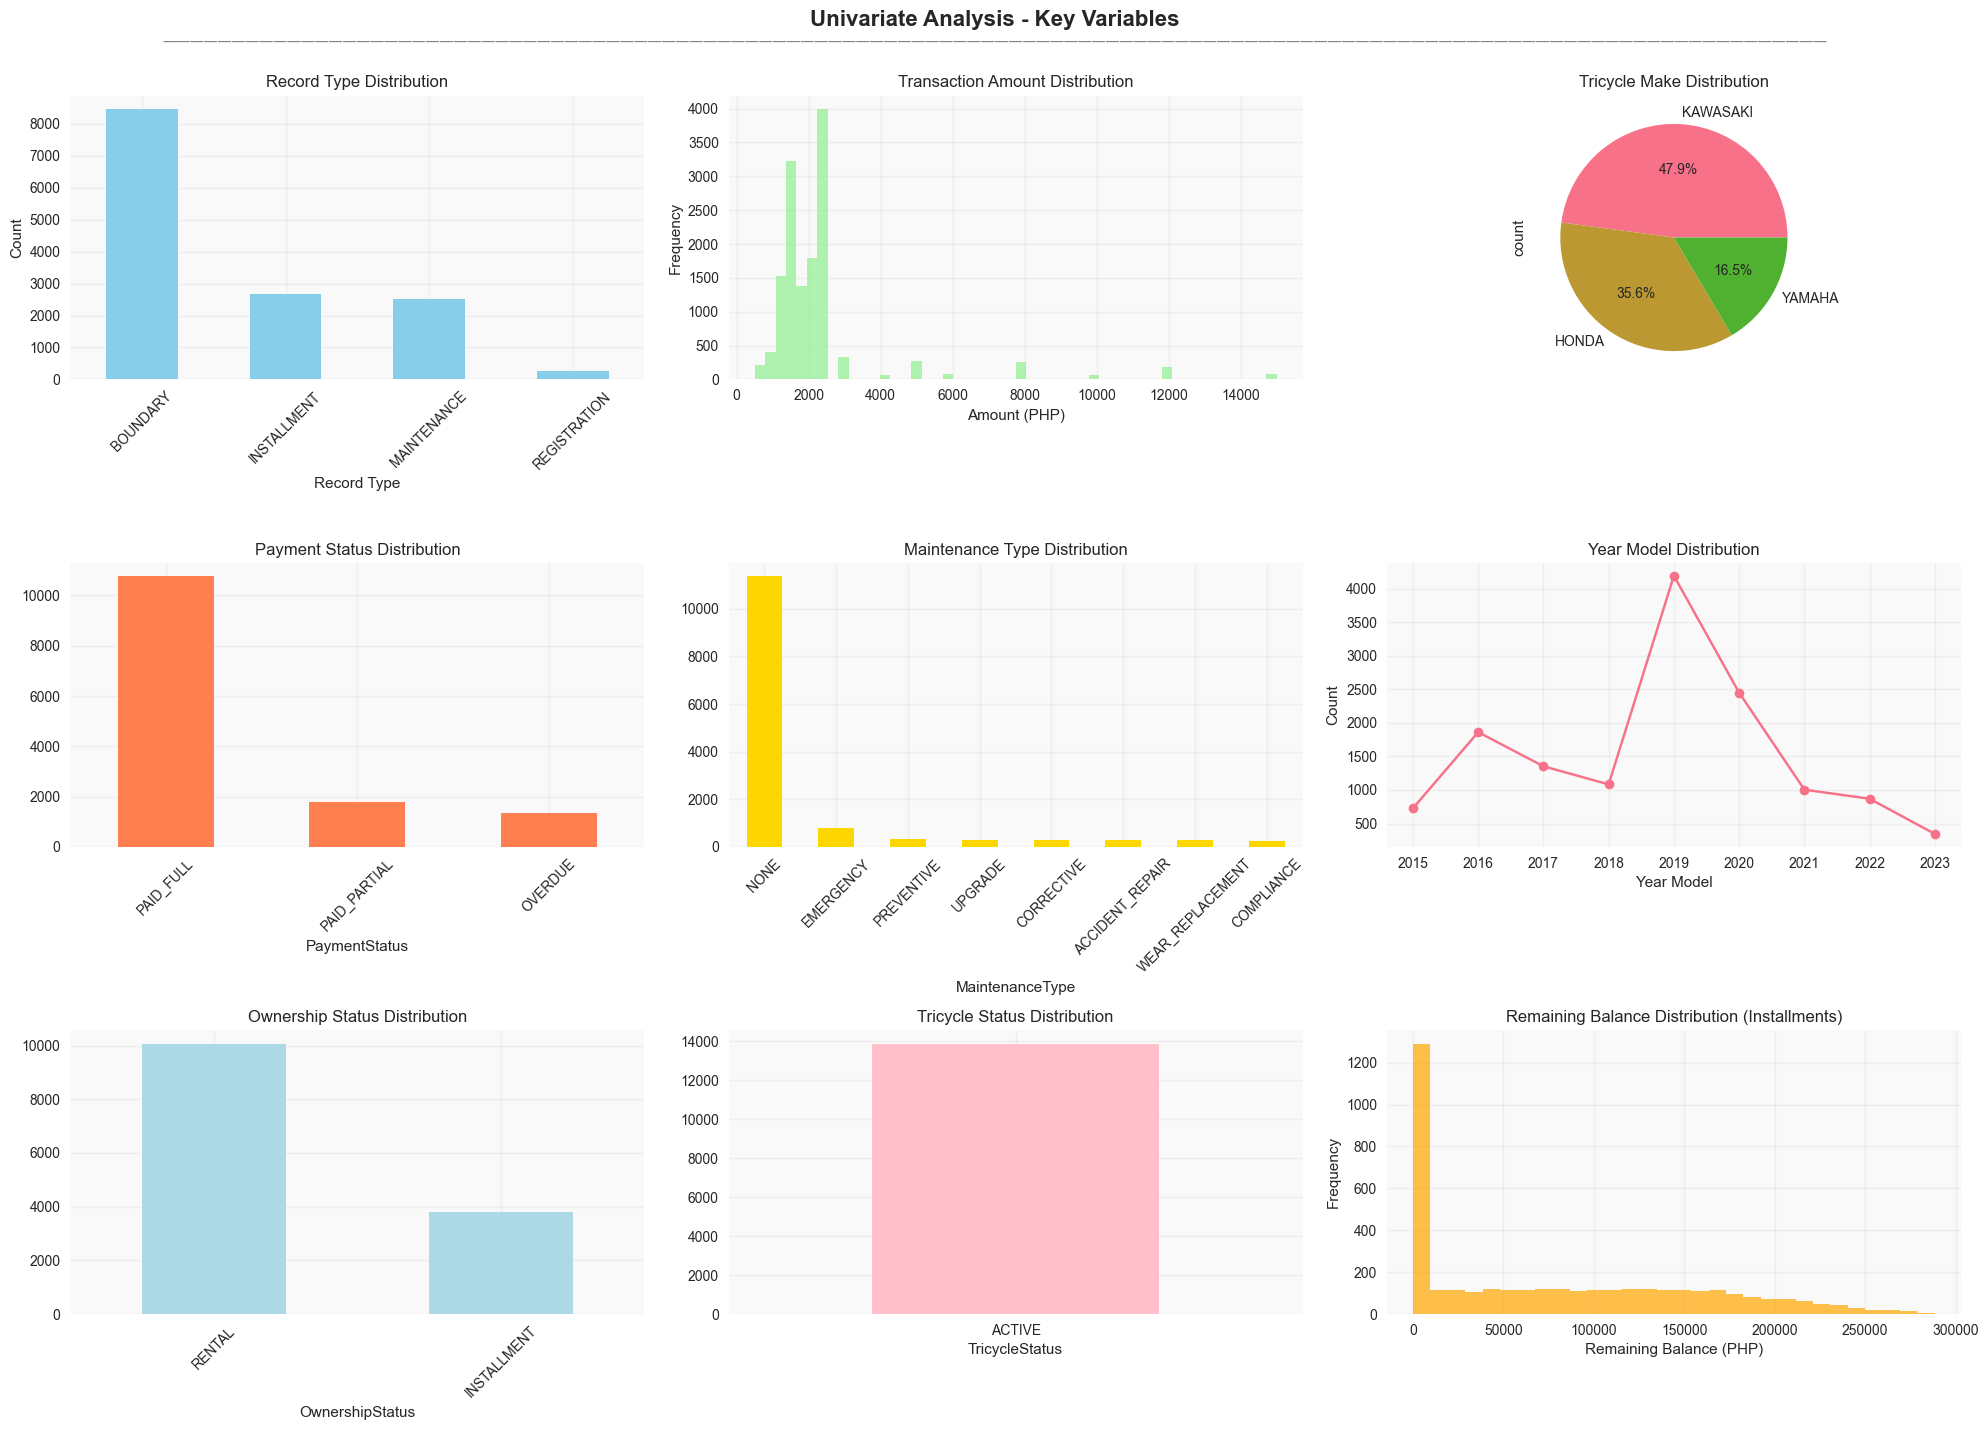


Summary Statistics for Numerical Variables
----------------------------------------
          YearModel       RegYear        RegFee  InstallmentPrice  TransactionAmount  RemainingBalance          Year         Month       Quarter     DayOfWeek  WeekOfYear   TricycleAge     PaidAmount  PaymentProgress  DriverTenure  DriverTenureMonths  PaymentFrequency  AvgPaymentAmount  PaymentVariability  MaintenanceFrequency  DaysLastMaintenance  HighRiskDriver  HighMaintenanceTricycle
count  13881.000000  13881.000000  13881.000000      13881.000000       13881.000000      13881.000000  13881.000000  13881.000000  13881.000000  13881.000000     13881.0  13881.000000   13881.000000     13881.000000  13881.000000        13881.000000      13881.000000      13881.000000        13881.000000          13881.000000               2517.0    13881.000000             13881.000000
mean    2018.723651   2021.393920     42.071897      62185.721490        2320.564080      21609.141993   2021.393920      6.626252   

In [9]:
print("\n4.1 UNIVARIATE ANALYSIS")
print("-" * 40)

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Univariate Analysis - Key Variables', fontsize=16, fontweight='bold')
fig.text(0.5, 0.958, '―' * 120, ha='center', va='center', fontsize=10, color='gray')

# 1. Record Type Distribution
df_clean['RecordType'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Record Type Distribution')
axes[0,0].set_xlabel('Record Type')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Transaction Amount Distribution
df_clean['TransactionAmount'].hist(bins=50, ax=axes[0,1], color='lightgreen', alpha=0.7)
axes[0,1].set_title('Transaction Amount Distribution')
axes[0,1].set_xlabel('Amount (PHP)')
axes[0,1].set_ylabel('Frequency')

# 3. Tricycle Make Distribution
df_clean['Make'].value_counts().plot(kind='pie', ax=axes[0,2], autopct='%1.1f%%')
axes[0,2].set_title('Tricycle Make Distribution')

# 4. Payment Status Distribution
df_clean['PaymentStatus'].value_counts().plot(kind='bar', ax=axes[1,0], color='coral')
axes[1,0].set_title('Payment Status Distribution')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Maintenance Type Distribution
df_clean['MaintenanceType'].value_counts().plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Maintenance Type Distribution')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Year Model Distribution
df_clean['YearModel'].value_counts().sort_index().plot(kind='line', ax=axes[1,2], marker='o')
axes[1,2].set_title('Year Model Distribution')
axes[1,2].set_xlabel('Year Model')
axes[1,2].set_ylabel('Count')

# 7. Ownership Status
df_clean['OwnershipStatus'].value_counts().plot(kind='bar', ax=axes[2,0], color='lightblue')
axes[2,0].set_title('Ownership Status Distribution')
axes[2,0].tick_params(axis='x', rotation=45)

# 8. Tricycle Status
df_clean['TricycleStatus'].value_counts().plot(kind='bar', ax=axes[2,1], color='pink')
axes[2,1].set_title('Tricycle Status Distribution')
axes[2,1].tick_params(axis='x', rotation=0)

# 9. Remaining Balance Distribution (for installments)
installment_data = df_clean[df_clean['OwnershipStatus'] == 'INSTALLMENT']['RemainingBalance']
if len(installment_data) > 0:
    installment_data.hist(bins=30, ax=axes[2,2], color='orange', alpha=0.7)
    axes[2,2].set_title('Remaining Balance Distribution (Installments)')
    axes[2,2].set_xlabel('Remaining Balance (PHP)')
    axes[2,2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Summary statistics
print("\nSummary Statistics for Numerical Variables")
print("-" * 40)
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
print(df_clean[numerical_cols].describe())

## > Bivariate analysis exploring relationships between variables


4.2 BIVARIATE ANALYSIS
----------------------------------------


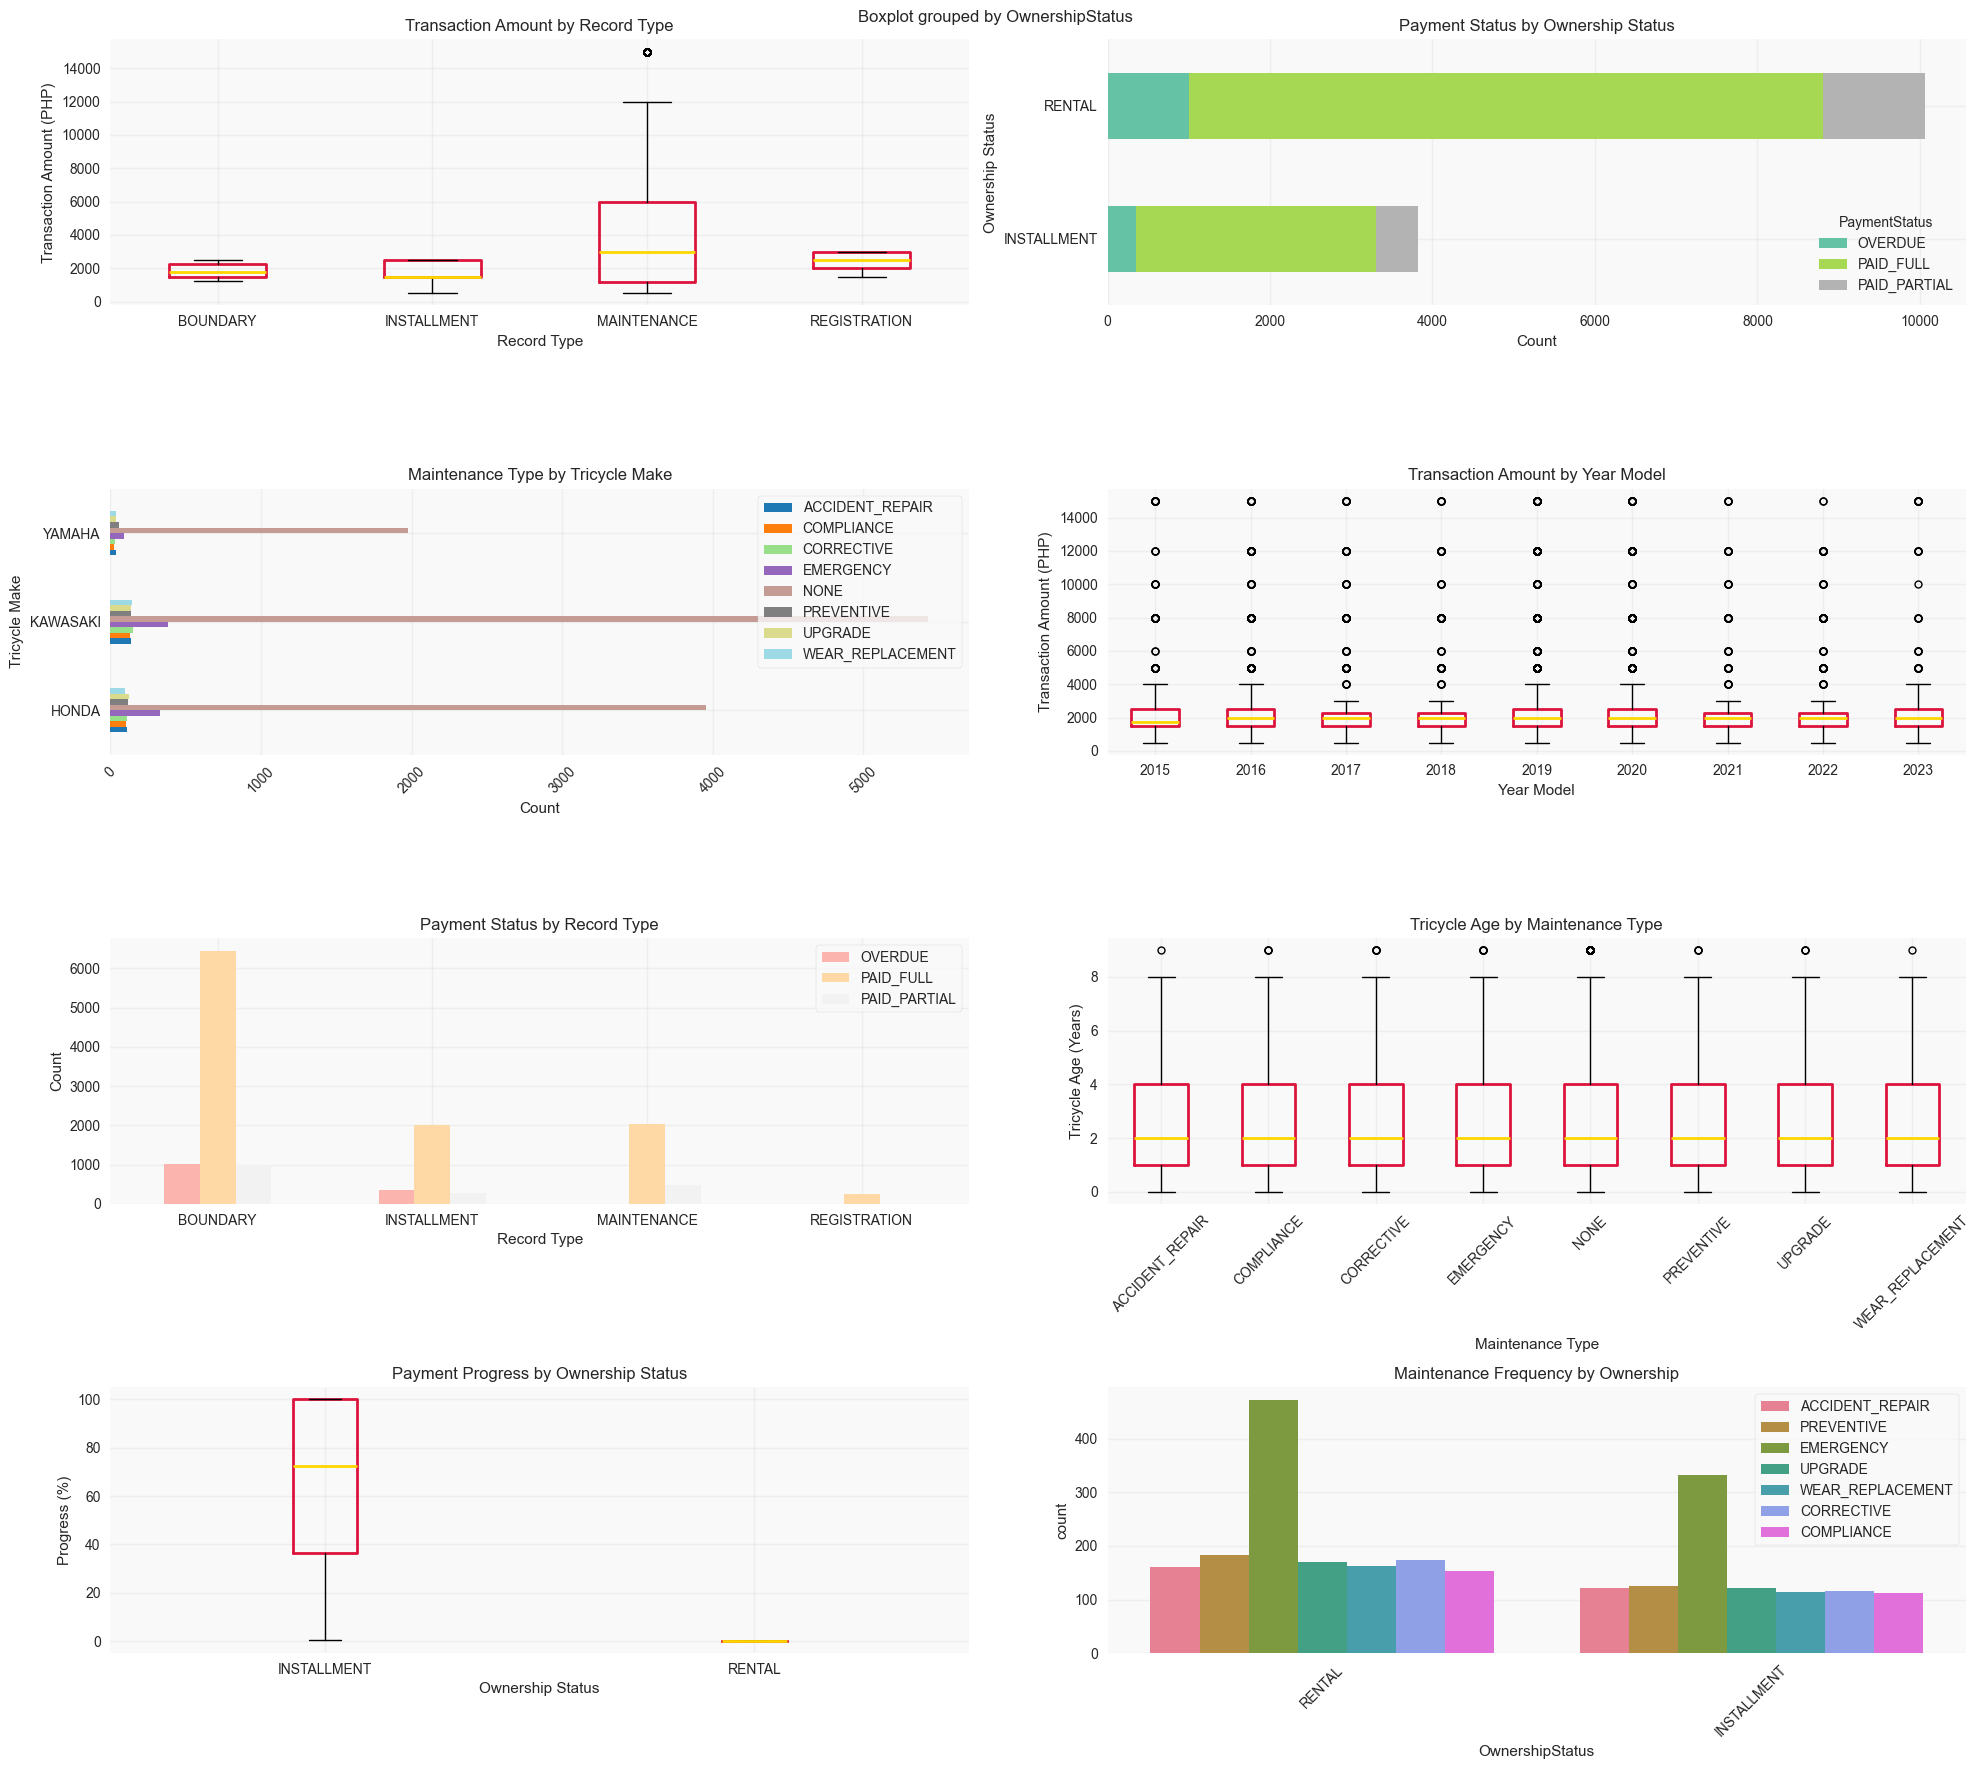

<Figure size 1200x800 with 0 Axes>

In [10]:
print("\n4.2 BIVARIATE ANALYSIS")
print("-" * 40)

fig, axes = plt.subplots(4, 2, figsize=(20, 18))
axes = axes.flatten()

# 1. Transaction Amount by Record Type (Boxplot)
df_clean.boxplot(
    column='TransactionAmount', by='RecordType', ax=axes[0],
    boxprops=dict(color='crimson', linewidth=2),
    medianprops=dict(color='gold', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', color='black', markersize=5)
)
axes[0].set_title('Transaction Amount by Record Type')
axes[0].set_xlabel('Record Type')
axes[0].set_ylabel('Transaction Amount (PHP)')

# 2. Payment Status by Ownership Status (Stacked Bar)
payment_ownership = pd.crosstab(df_clean['OwnershipStatus'], df_clean['PaymentStatus'])
payment_ownership.plot(kind='barh', stacked=True, ax=axes[1], colormap='Set2')
axes[1].set_title('Payment Status by Ownership Status')
axes[1].set_ylabel('Ownership Status')
axes[1].set_xlabel('Count')

# 3. Maintenance Type by Make (Clustered Bar)
maint_make = pd.crosstab(df_clean['Make'], df_clean['MaintenanceType'])
maint_make.plot(kind='barh', ax=axes[2], colormap='tab20')
axes[2].set_title('Maintenance Type by Tricycle Make')
axes[2].set_ylabel('Tricycle Make')
axes[2].set_xlabel('Count')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(frameon=True)

# 4. Transaction Amount vs Year Model (Boxplot)
df_clean.boxplot(
    column='TransactionAmount', by='YearModel', ax=axes[3],
    boxprops=dict(color='crimson', linewidth=2),
    medianprops=dict(color='gold', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', color='black', markersize=5)
)
axes[3].set_title('Transaction Amount by Year Model')
axes[3].set_xlabel('Year Model')
axes[3].set_ylabel('Transaction Amount (PHP)')

# 5. Payment Status by Record Type (Bar Chart)
pay_record = pd.crosstab(df_clean['RecordType'], df_clean['PaymentStatus'])
pay_record.plot(kind='bar', ax=axes[4], colormap='Pastel1')
axes[4].set_title('Payment Status by Record Type')
axes[4].set_xlabel('Record Type')
axes[4].set_ylabel('Count')
axes[4].tick_params(axis='x', rotation=0)
axes[4].legend(frameon=True)

# 6. Tricycle Age vs Maintenance Type (Boxplot)
df_clean.boxplot(
    column='TricycleAge', by='MaintenanceType', ax=axes[5],
    boxprops=dict(color='crimson', linewidth=2),
    medianprops=dict(color='gold', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', color='black', markersize=5)
)
axes[5].set_title('Tricycle Age by Maintenance Type')
axes[5].set_xlabel('Maintenance Type')
axes[5].set_ylabel('Tricycle Age (Years)')
axes[5].tick_params(axis='x', rotation=45)

# 7. Payment Progress by Ownership Status (Boxplot)
df_clean.boxplot(
    column='PaymentProgress', by='OwnershipStatus', ax=axes[6],
    boxprops=dict(color='crimson', linewidth=2),
    medianprops=dict(color='gold', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', color='black', markersize=5)
)
axes[6].set_title('Payment Progress by Ownership Status')
axes[6].set_xlabel('Ownership Status')
axes[6].set_ylabel('Progress (%)')

# 8. Maintenance Type by Payment Status (Clustered Bar)
maintenance_df = df_clean[df_clean['RecordType'] == 'MAINTENANCE']
sns.countplot(data=maintenance_df, x='OwnershipStatus', hue='MaintenanceType', ax=axes[7])
axes[7].set_title("Maintenance Frequency by Ownership")
axes[7].tick_params(axis='x', rotation=45)
axes[7].legend(frameon=True)
plt.tight_layout()
plt.show()


# Add title and separator
fig.suptitle('Bivariate Analysis - Key Relationships', fontsize=16, fontweight='bold')
fig.text(0.5, 0.96, '―' * 120, ha='center', va='center', fontsize=10, color='gray')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## > Time series analysis of key metrics


4.3 TEMPORAL ANALYSIS
----------------------------------------


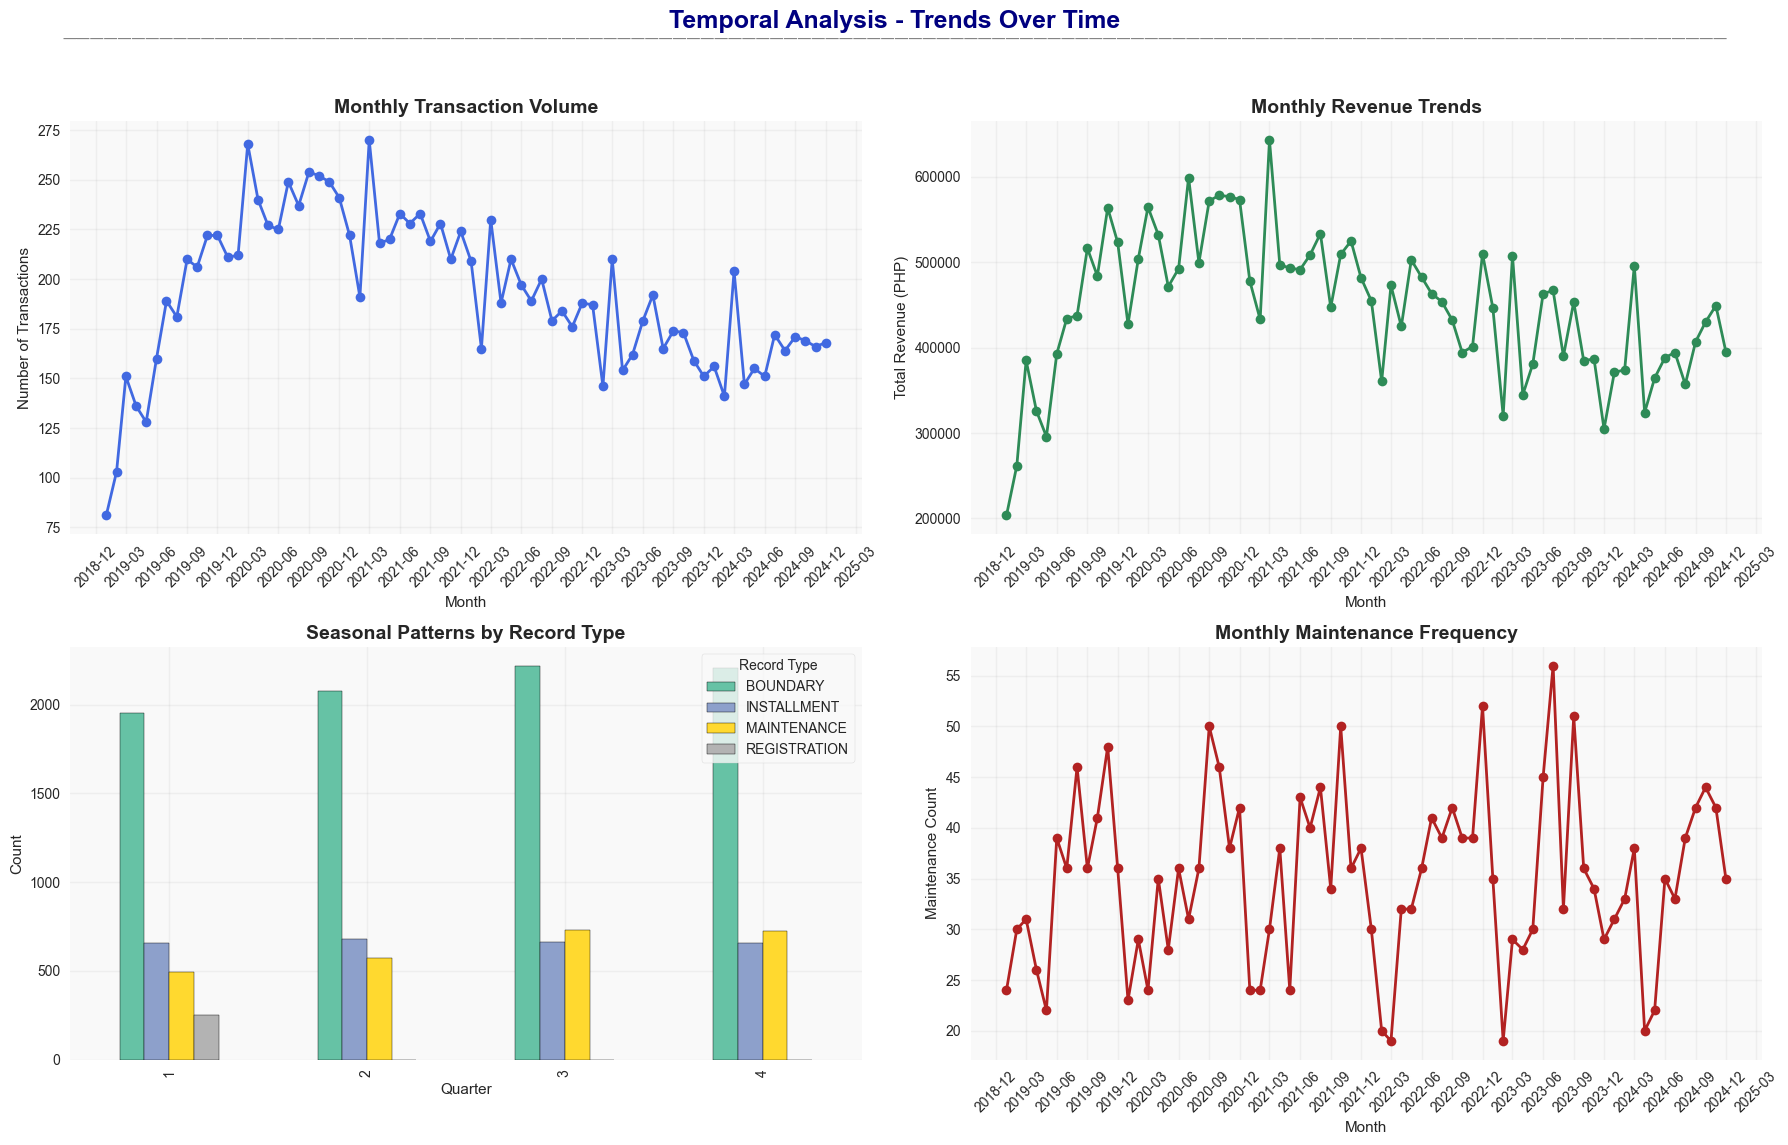

In [11]:
print("\n4.3 TEMPORAL ANALYSIS")
print("-" * 40)

df_clean['DateRecord'] = pd.to_datetime(df_clean['DateRecord'])

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Temporal Analysis - Trends Over Time', fontsize=18, fontweight='bold', color='navy')

# Shared styles
for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# 1. Monthly transaction volume
monthly_transactions = df_clean.groupby(df_clean['DateRecord'].dt.to_period('M')).size()
monthly_transactions.index = monthly_transactions.index.to_timestamp()
axes[0, 0].plot(monthly_transactions.index, monthly_transactions.values, marker='o', linestyle='-', color='royalblue', linewidth=2)
axes[0, 0].set_title('Monthly Transaction Volume', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Transactions')

# 2. Monthly revenue trends
monthly_revenue = df_clean.groupby(df_clean['DateRecord'].dt.to_period('M'))['TransactionAmount'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()
axes[0, 1].plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-', color='seagreen', linewidth=2)
axes[0, 1].set_title('Monthly Revenue Trends', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Total Revenue (PHP)')

# 3. Seasonal patterns by Record Type
seasonal_records = df_clean.groupby([df_clean['DateRecord'].dt.quarter, 'RecordType']).size().unstack()
seasonal_records.plot(kind='bar', ax=axes[1, 0], colormap='Set2', edgecolor='black')
axes[1, 0].set_title('Seasonal Patterns by Record Type', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Record Type', frameon=True)

# 4. Monthly maintenance frequency
maintenance_df = df_clean[df_clean['RecordType'] == 'MAINTENANCE']
if not maintenance_df.empty:
    monthly_maintenance = maintenance_df.groupby(maintenance_df['DateRecord'].dt.to_period('M')).size()
    monthly_maintenance.index = monthly_maintenance.index.to_timestamp()
    axes[1, 1].plot(monthly_maintenance.index, monthly_maintenance.values, marker='o', linestyle='-', color='firebrick', linewidth=2)
    axes[1, 1].set_title('Monthly Maintenance Frequency', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Maintenance Count')

# Optional: improve date formatting
for ax in [axes[0,0], axes[0,1], axes[1,1]]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

fig.text(0.5, 0.955, '―' * 120, ha='center', va='center', fontsize=10, color='gray')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## > Multivariate Analysis: Numerical vs Categorical vs Mixed-Type


A. Correlation Matrix (Numerical Variables)


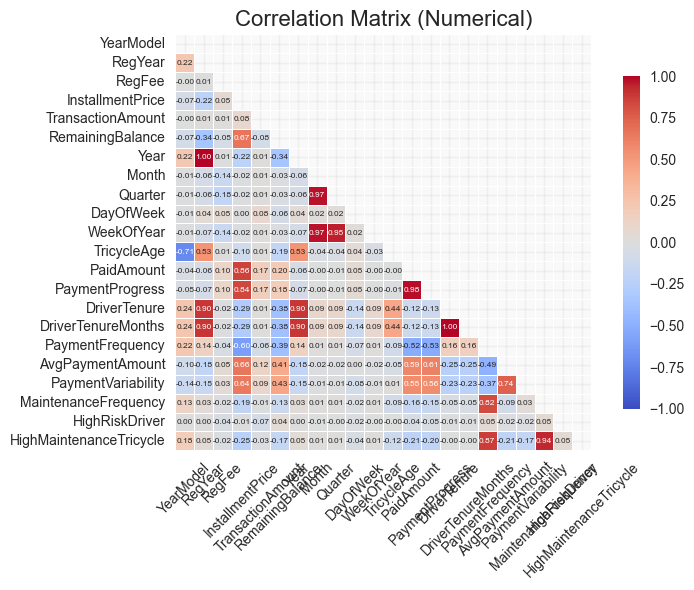

In [12]:
print("\nA. Correlation Matrix (Numerical Variables)")

# Select usable numeric columns
num_df = df_clean.select_dtypes(include=[np.number]).dropna(axis=1, how='all')
num_df = num_df.loc[:, num_df.nunique() > 1]
corr = num_df.corr()

plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
    square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 6})
plt.title("Correlation Matrix (Numerical)", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


B. Categorical Associations (Cramér's V)


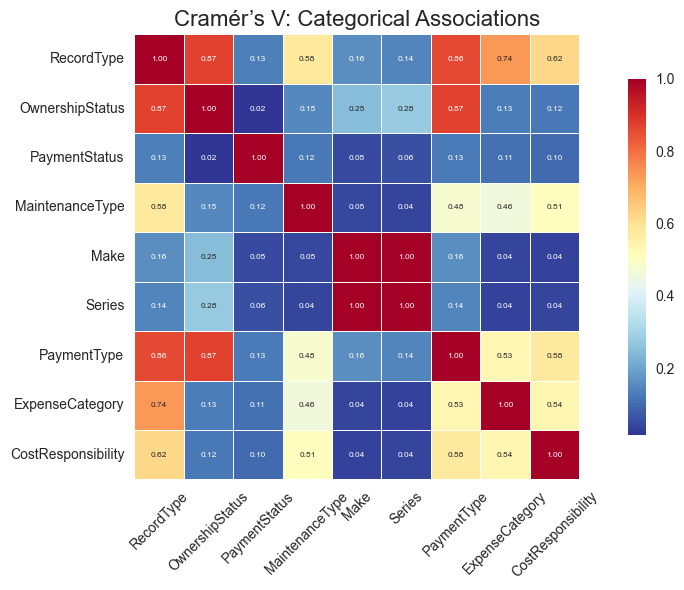

In [13]:
print("\nB. Categorical Associations (Cramér's V)")

def cramers_v(x, y):
    try:
        valid = pd.notna(x) & pd.notna(y)
        table = pd.crosstab(x[valid], y[valid])
        if table.shape[0] < 2 or table.shape[1] < 2:
            return 0.0
        chi2 = chi2_contingency(table)[0]
        n = table.sum().sum()
        return np.sqrt((chi2 / n) / min(table.shape[0] - 1, table.shape[1] - 1))
    except:
        return 0.0

# Categorical columns (filtering only those that exist)
cat_cols = [col for col in [
    'RecordType', 'OwnershipStatus', 'PaymentStatus', 'MaintenanceType', 
    'Make', 'Series', 'PaymentType', 'ExpenseCategory', 'CostResponsibility'
] if col in df_clean.columns and df_clean[col].nunique() > 1]


assoc = pd.DataFrame(np.ones((len(cat_cols), len(cat_cols))), index=cat_cols, columns=cat_cols)

for i in range(len(cat_cols)):
    for j in range(i + 1, len(cat_cols)):
        v = cramers_v(df_clean[cat_cols[i]], df_clean[cat_cols[j]])
        assoc.iloc[i, j] = assoc.iloc[j, i] = v

plt.figure(figsize=(10, 6))
sns.heatmap(assoc, annot=True, cmap="RdYlBu_r", fmt=".2f", square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 6})
plt.title("Cramér’s V: Categorical Associations", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 15 strongest categorical-numerical relationships (ANOVA):
         Categorical                Numerical   F_Statistic  P_Value  Eta_Squared Effect_Size
109    LicenseNumber       PaymentVariability           inf      0.0     1.000000       Large
84   DriverContactNo         PaymentFrequency           inf      0.0     1.000000       Large
87   DriverContactNo     MaintenanceFrequency           inf      0.0     1.000000       Large
108    LicenseNumber         AvgPaymentAmount           inf      0.0     1.000000       Large
250    PaymentStatus           HighRiskDriver           inf      0.0     1.000000       Large
94     LicenseNumber         InstallmentPrice           inf      0.0     1.000000       Large
107    LicenseNumber         PaymentFrequency           inf      0.0     1.000000       Large
85   DriverContactNo         AvgPaymentAmount           inf      0.0     1.000000       Large
113    LicenseNumber  HighMaintenanceTricycle           inf      0.0     1.000000       Larg

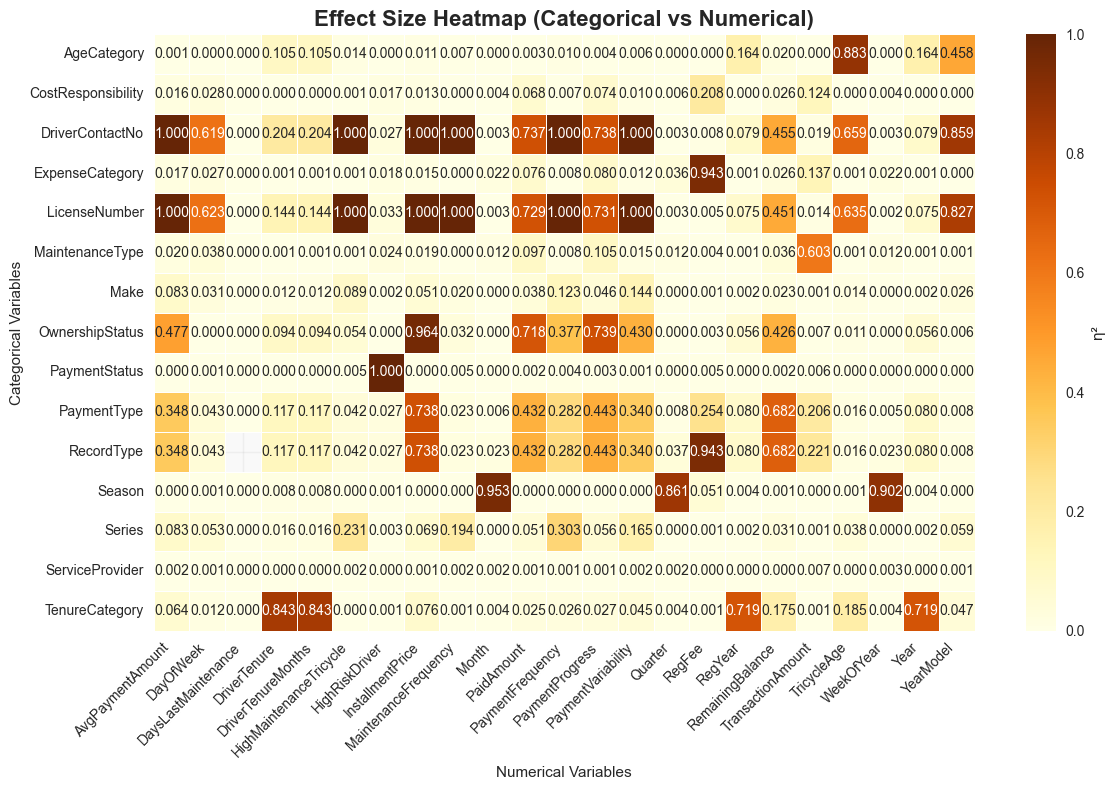

In [14]:
from scipy.stats import f_oneway
# Select numerical columns excluding IDs
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if not col.endswith('ID') and col not in ['RecordID', 'RegID', 'PaymentID', 'MaintenanceID', 'DriverID']]
# Categorical columns
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if df_clean[col].nunique() < 50 and df_clean[col].nunique() > 1]

anova_results = []

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        valid_mask = pd.notna(df_clean[cat_col]) & pd.notna(df_clean[num_col])
        if valid_mask.sum() < 10:
            continue

        groups = [df_clean[num_col][valid_mask][df_clean[cat_col][valid_mask] == cat] 
                  for cat in df_clean[cat_col][valid_mask].unique()]

        if len(groups) < 2:
            continue

        f_stat, p_val = f_oneway(*groups)
        grand_mean = df_clean[num_col][valid_mask].mean()
        ss_total = ((df_clean[num_col][valid_mask] - grand_mean) ** 2).sum()
        ss_between = sum([len(group) * (group.mean() - grand_mean) ** 2 for group in groups])
        eta_sq = ss_between / ss_total if ss_total != 0 else 0

        anova_results.append({
            'Categorical': cat_col,
            'Numerical': num_col,
            'F_Statistic': f_stat,
            'P_Value': p_val,
            'Eta_Squared': eta_sq,
            'Effect_Size': 'Small' if eta_sq < 0.06 else 'Medium' if eta_sq < 0.14 else 'Large'
        })

anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values('Eta_Squared', ascending=False)
print("Top 15 strongest categorical-numerical relationships (ANOVA):")
print(anova_df.head(15))

pivot_eta = anova_df.pivot(index='Categorical', columns='Numerical', values='Eta_Squared')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_eta, annot=True, fmt=".3f", cmap="YlOrBr", linewidths=0.5, cbar_kws={'label': 'η²'})
plt.title("Effect Size Heatmap (Categorical vs Numerical)", fontsize=16, fontweight='bold')
plt.xlabel("Numerical Variables")
plt.ylabel("Categorical Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Additional Insights
----------------------------------------


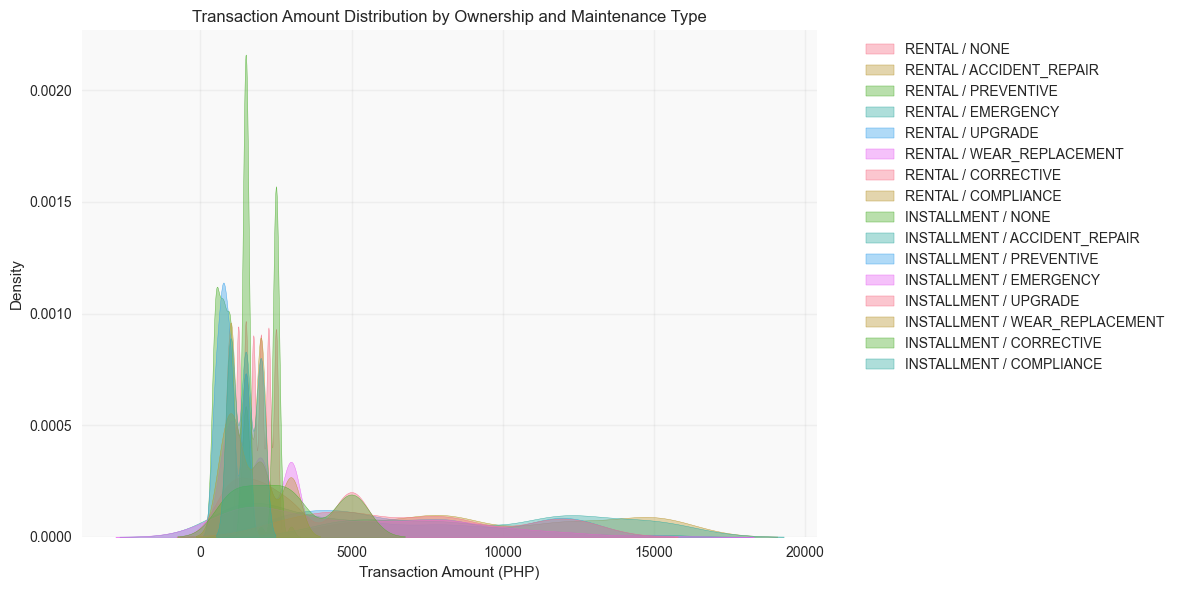

In [15]:
print("\nAdditional Insights")
print("-" * 40)

plt.figure(figsize=(12, 6))

# Plot KDEs for each OwnershipStatus + MaintenanceType combination
for ownership in df_clean['OwnershipStatus'].dropna().unique():
    for maint in df_clean['MaintenanceType'].dropna().unique():
        subset = df_clean[
            (df_clean['OwnershipStatus'] == ownership) & 
            (df_clean['MaintenanceType'] == maint)
        ]
        if not subset.empty:
            sns.kdeplot(
                data=subset,
                x='TransactionAmount',
                label=f"{ownership} / {maint}",
                fill=True,
                alpha=0.4
            )

plt.title("Transaction Amount Distribution by Ownership and Maintenance Type")
plt.xlabel("Transaction Amount (PHP)")
plt.ylabel("Density")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C. Mixed-Type Variable Exploration (Bell Curves)


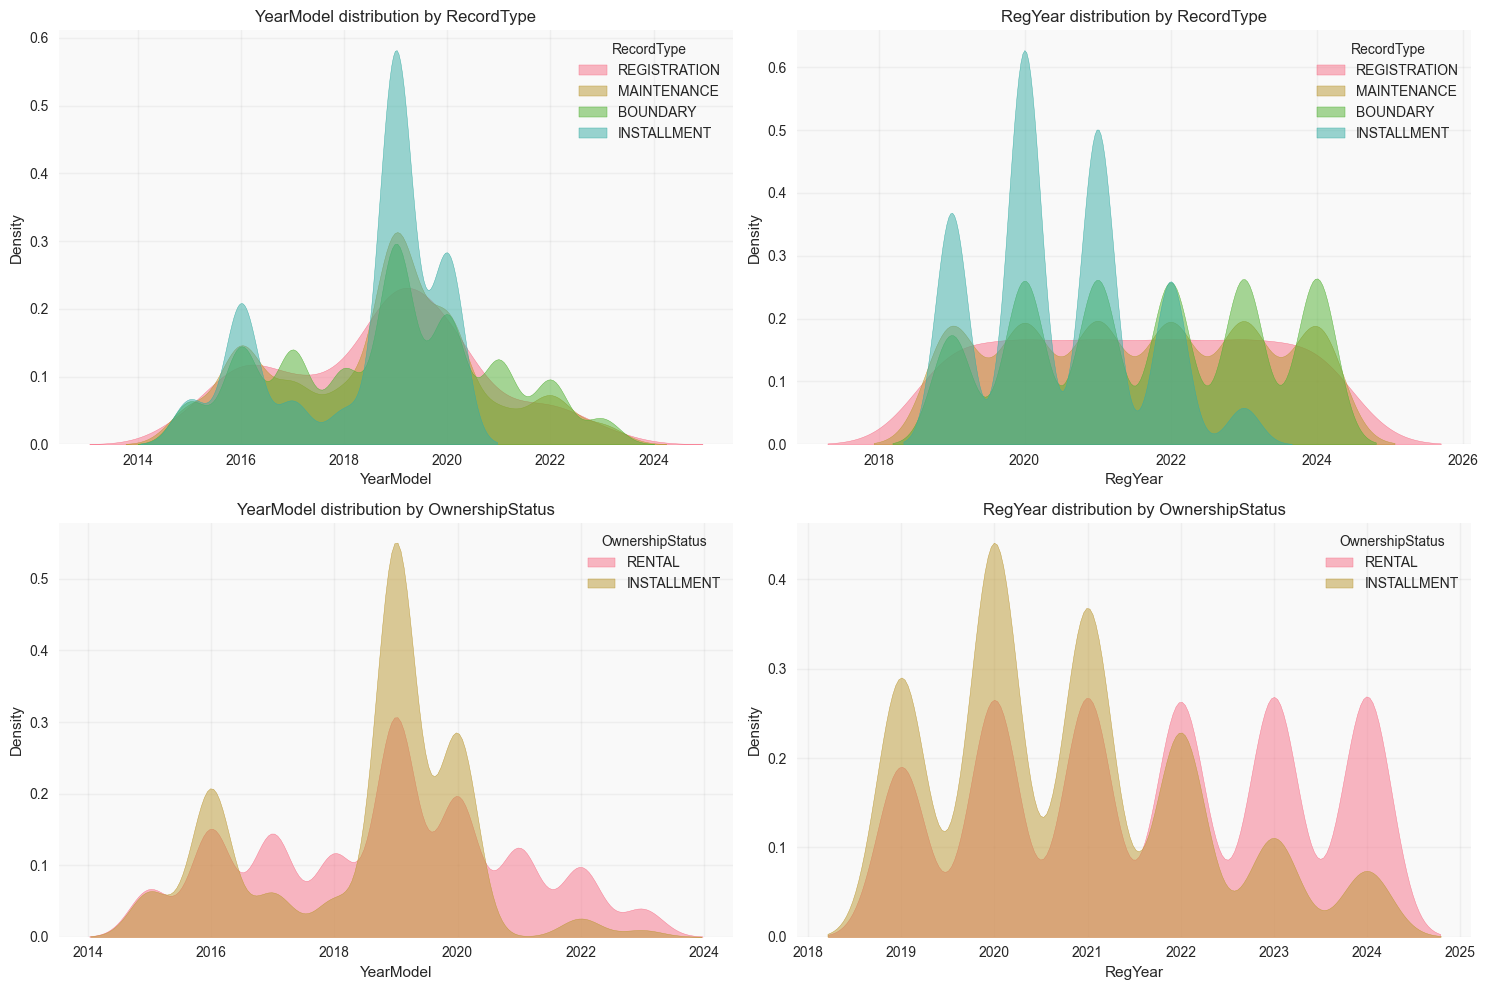

In [16]:
print("\nC. Mixed-Type Variable Exploration (Bell Curves)")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
plot_count = 0

for cat in cat_cols[:2]:
    for num in num_df.columns[:2]:
        for cat_level in df_clean[cat].dropna().unique():
            sns.kdeplot(
                data=df_clean[df_clean[cat] == cat_level],
                x=num,
                ax=axes[plot_count],
                label=str(cat_level),
                fill=True,
                common_norm=False,  # so area under each category's curve sums to 1 separately
                alpha=0.5
            )
        axes[plot_count].set_title(f'{num} distribution by {cat}')
        axes[plot_count].legend(title=cat)
        plot_count += 1

for i in range(plot_count, 4):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

> Primary Training Features:

* Driver-related: DriverTenure, DriverTenureMonths, DriverStartDate
* Financial: TransactionAmount, PaymentProgress, PaidAmount, RemainingBalance
* Vehicle: TricycleAge, Make, Series, YearModel
* Temporal: Year, Month, Quarter, Season, IsWeekend
* Operational: RecordType, OwnershipStatus, PaymentType
* Maintenance: HasMaintenance, IsOverdue, IsEmergencyRepair

>Rationale: These parameters capture the multi-dimensional nature of franchise operations, combining human factors (driver reliability), asset characteristics (vehicle condition), financial behavior (payment patterns), and temporal patterns (seasonal effects).

> Target Variable: TricycleAge (Regression)

> Predict: Asset lifecycle and replacement timing

> Why: Strategic asset management and ROI optimization

#### Preparing for Model Development:
* What are the insights gained?
* Are the research questions answered?
* What strategies used/necessary to address each data treatment? (Null treatment, Outlier treatment, etc.)
* What are the plotting tools used? and why?
* How are you going to train the model? What learning methods will be use to make the predictions? Explain the evaluation metrics.
* State the insights gained during and after training the model with the outputs.